# $$ \textbf{Projeto de aprendizado de máquina- Vendas de jogos} $$

> O conjuto de dados deste projeto é disponibilizado pela plataforma Kaggle ,
conhecida como um site de competiçoes para uso e técnicas aplicadas a Machine Learning., onde foi feito Scraping em 2016 da base de dados, foi realizado outro Scraping em 2022, outubro, para coletar novas informações e unir ambas tabelas

### Web Scraping : 
* Notebook jupyter github : https://github.com/JanathanPlanas/Machine-Learning/blob/main/Data%20Science%20Project%20End%20to%20End/Dataset/SCRAPING%20(1).ipynb

* Web Scraping da fonte de dados : https://www.vgchartz.com/

In [44]:

from platform import python_version # Python ≥3.5 is required


print("Current Python Version-", python_version())

Current Python Version- 3.7.15


In [ ]:
import numpy
numpy.version.version

'1.21.6'

In [45]:
pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: pytz, python-dateutil, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc, prophet, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fastai, datascience, cufflinks, cmdstanpy, arviz, altair


In [46]:
print('The scikit-learn version is {}.'.format(sklearn.__version__)) 
# Scikit-Learn ≥0.20 is required

print('matplotlib: {}'.format(matplotlib.__version__))

The scikit-learn version is 1.0.2.
matplotlib: 3.2.2


In [48]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("fivethirtyeight")
import warnings 
warnings.filterwarnings('ignore')

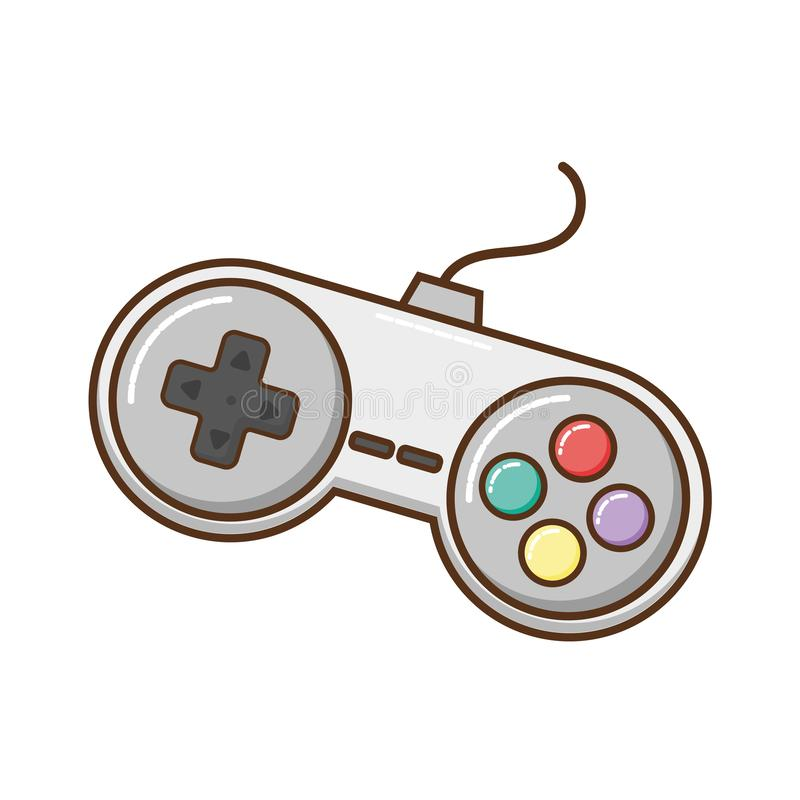

>Esse projeto foi construido com o interesse de sabermos o comportamento do interesse de jovens e adultos na compra de jogos, quais os estilos de jogos que foram mais comprados e montar uma linha de perfil do usuário gamer de dados de 1980 até 2020. Nosso principal propósito é responder as seguintes perguntas:     
* Quais melhores jogos vendidos por gênero ? 
* Quais melhores plataformas de lançamento para jogos  ? 
* O que define um bom jogo ? 
* Qual o comportamento esperado nos próximos 10 anos ?



>Aqui podemos ver um breve explicado do contéudo do conjunto de dados amostrado

* Name - O título do Jogo
* Platform - Por qual plataforma o jogo foi liberado (e.g. PC, Wii etc.)
* Year_of_Release - Ano de lançamento
* Genre - Gênero do jogo (as classified by vgchartz)
* Publisher - A empresa que publicou o lançamento
* NA_Sales - Vendas na Ámerica do Norte (in millions)
* EU_Sales - Vendas na Europa(in millions)
* JP_Sales - Vendas no Japão (in millions)
* Other_Sales - Venda em outos países (in millions)
* Global_Sales - Total de Vendas ao redor do Mundo (in millions)
* Critic_Score - Pontuação média arredondada dada a um jogo pelos críticos (um inteiro de 100)
* Critic_Count -Número de pontuações críticas dadas
* User_Score -Pontuação média arredondada dada a um jogo pelos usuários do vgchartz (para o décimo mais próximo)
* User_Count - Número de pontuações do usuário fornecidas
* Developer - A empresa que desenvolveu o videogame
* Classificação - Classificação oficial ESRB



 # $$ \textbf{Importantes insights que queremos extrair dos dados} : $$
 
> * Qual o melhor jogo em questão de faturamento e melhor avaliação da crítica por plataforma ?
> * Qual foi o melhor anos dentro os 40 anos trabalhados em questão de faturamento ?
> * Como saber o faturamento do jogo antes de seu lançamento, baseado no perfil do usuário.
> * O quanto a classificação indicativa ou o gênero do jogo influência na sua venda ?


### $$ \textbf{IMPORTAÇÃO DE BLIBLIOTECAS} $$

*  Abaixo temos um conjunto de dados que elucida a venda de jogos



In [54]:
#Fazendo importação das bibliotecas necessárias para extração, transformação e carregamento dos dados.
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn

vg = pd.read_csv('https://raw.githubusercontent.com/JanathanPlanas/Machine-Learning/main/Data%20Science%20Project%20End%20to%20End/Dataset/vgsales.csv')
data = pd.read_csv('https://raw.githubusercontent.com/JanathanPlanas/Machine-Learning/main/Data%20Science%20Project%20End%20to%20End/Dataset/Video_Games_Sales_as_at_22_Dec_2016.csv') # Lendo o dataset com pandas


data.info() # Verificando inforamções do tipo de dados e a presenção de dados nullos, memória usada , quantidade de colunas
# e quantas linhas o dado tem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [55]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


 > Em uma visão geral, temos 16 mil valores de vendas pra trabalharmos igualmente com Nome, Platafroma, Gênro, Ano de lançamento.  
Valores inferiores se tratando de Desenvoledores e Classificação indicativa e Pontuação. Segue abaixo melhores detalhes :
* Nome > 16 Mil
* Plataforma > 16 Mil 
* Vendas > 16 Mil
* Ano de Lançamento > 16 Mil 
* Crítica de Usuário e da crítica > 8 Mil
* Classificação > 10 Mil 

In [56]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [57]:
vg.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


 > Esse outro dataset foi gerado por Web Scraping em 2022 contendo mais informações relevantes e podemos relacionar as tuas tabelas pra aumentar nosso conjunto de dados
* Nome > 55 Mil
* Plataforma > 55 Mil 
* Vendas > 15 Mil
* Ano de Lançamento > 55 Mil 
* Crítica de Usuário e da crítica > 6 Mil
* Classificação > 20 Mil 

 > No dataset geral vemos muitas colunas sem uso pro nosso propósito que vamos descartar e estas não vao alterar no nosso resultado .
 >> Apagando colunas sem utilidade para o nosso propósito 

In [59]:
colvg = vg.columns
coldata = data.columns
print ( " COLUNAS DO DATASET VG = {}  \n \n\n  COLUNAS DO DATASET DATA   {}".format(colvg , coldata ))
vg = vg.rename(columns= {'ESRB_Rating':'Rating','Year':'Year_of_Release','PAL_Sales':'EU_Sales'})
data = data.drop(columns=['Global_Sales'])
vg = vg.drop(columns=['Rank', 'basename', 'VGChartz_Score','Total_Shipped', 'Global_Sales', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'])

 COLUNAS DO DATASET VG = Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')  
 

  COLUNAS DO DATASET DATA   Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


Fazendo uma união da tabela vg e data , expadindo nosso dataset pra trabalhar com os dados

In [60]:
vgsales = pd.merge(data,vg, on =['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
        'User_Score', 'Developer', 'Rating' ], how = 'outer' )
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72507 entries, 0 to 72506
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             72505 non-null  object 
 1   Platform         72507 non-null  object 
 2   Year_of_Release  71259 non-null  float64
 3   Genre            72505 non-null  object 
 4   Publisher        72453 non-null  object 
 5   NA_Sales         29679 non-null  float64
 6   EU_Sales         29904 non-null  float64
 7   JP_Sales         23758 non-null  float64
 8   Other_Sales      32237 non-null  float64
 9   Critic_Score     14673 non-null  float64
 10  Critic_Count     8137 non-null   float64
 11  User_Score       7925 non-null   float64
 12  User_Count       7590 non-null   float64
 13  Developer        65867 non-null  object 
 14  Rating           33569 non-null  object 
dtypes: float64(9), object(6)
memory usage: 8.9+ MB


In [61]:
# APAGANDO COLUNAS DUPLICADAS
vgsales = vgsales.drop_duplicates(subset=['Genre','Name','Platform','Year_of_Release'])
vgsales['Global_Sales'] = vgsales['EU_Sales'] + vgsales['JP_Sales']+ vgsales['NA_Sales'] + vgsales['Other_Sales'] #MONTANDO COLUNA DE VENDAS GLOBAIS 
vgsales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72502,Indivisible,PC,2019.0,Role-Playing,505 Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lab Zero Games,NaN,NaN
72503,Lost Ember,PC,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72504,Lost Ember,PS4,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN
72505,Lost Ember,XOne,2019.0,Adventure,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mooneye Studios,RP,NaN


## $$  \textbf{Valores Nulos  & Correlação} $$


In [42]:

df2 = vgsales.replace(np.nan, 0)
df2 = vgsales.dropna()
df2.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

In [ ]:
df2.shape

(6824, 16)

In [39]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [41]:
missing_values_table(vgsales)

Your selected dataframe has 16 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
User_Count,52535,87.4
User_Score,52342,87.1
Critic_Count,51988,86.5
Critic_Score,48661,80.9
Global_Sales,42400,70.5
JP_Sales,40317,67.1
NA_Sales,39107,65.0
EU_Sales,38576,64.2
Other_Sales,37664,62.6
Rating,35888,59.7


## $$\textbf{HeatMap}$$

In [ ]:
vgsales.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
Year_of_Release,1.000000,-0.055051,0.048231,-0.166759,0.050463,0.045457,0.203413,-0.219889,0.199385,0.003531
NA_Sales,-0.055051,1.000000,0.803449,0.426871,0.704984,0.133677,0.283902,0.085815,0.246204,0.947527
EU_Sales,0.048231,0.803449,1.000000,0.464565,0.727999,0.103161,0.265727,0.056350,0.283501,0.931873
JP_Sales,-0.166759,0.426871,0.464565,1.000000,0.336452,0.003823,0.168290,0.129043,0.072769,0.580425
Other_Sales,0.050463,0.704984,0.727999,0.336452,1.000000,0.111362,0.239501,0.057482,0.240082,0.805460
Critic_Score,0.045457,0.133677,0.103161,0.003823,0.111362,1.000000,0.396555,0.458854,0.265672,0.104044
Critic_Count,0.203413,0.283902,0.265727,0.168290,0.239501,0.396555,1.000000,0.195047,0.365600,0.290433
User_Score,-0.219889,0.085815,0.056350,0.129043,0.057482,0.458854,0.195047,1.000000,0.017526,0.089390
User_Count,0.199385,0.246204,0.283501,0.072769,0.240082,0.265672,0.365600,0.017526,1.000000,0.264174
Global_Sales,0.003531,0.947527,0.931873,0.580425,0.805460,0.104044,0.290433,0.089390,0.264174,1.000000


> Certos campos têm altos valores ausentes devido ao fato de não serem aplicáveis ​​a determinados jogos. Por exemplo, o ESRB foi estabelecido em 1994, o que significa que muitos videogames criados antes disso provavelmente não terão uma classificação.

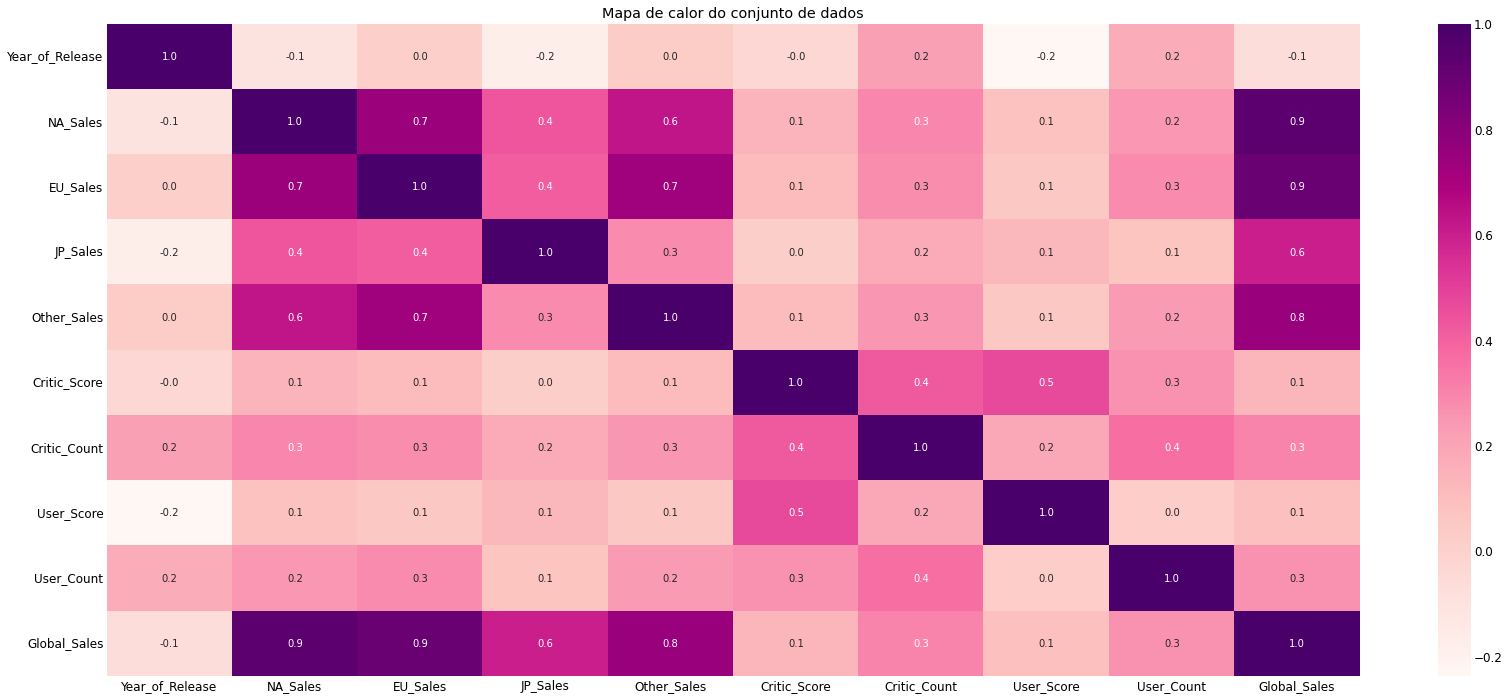

In [76]:
cmap = sns.cubehelix_palette(reverse=True)
azul = sns.cubehelix_palette(rot=-.4)
roxo = sns.color_palette("flare", as_cmap= False)
#  CORRELAÇÕES
corr_matriz = vgsales.corr()
plt.figure(figsize=(25,12))
plt.title("Mapa de calor do conjunto de dados")
sns.heatmap(corr_matriz, annot=True, fmt = '.1f' , cmap = 'RdPu')


>Imediatamente, podemos ver como todos os valores das vendas NA, EU, JP, Outros e Global estão altamente correlacionados. A multicolinearidade das vendas globais é esperada, pois é a soma de todas as vendas da região. Também é justo esperar que um videogame que obteve altas vendas em uma região também venda bem em outra região.

>Curiosamente, as vendas de JP parecem ter a correlação mais fraca em comparação com os outros mercados, possivelmente sugerindo que há menos sobreposição entre os mercados no Japão do que em outras regiões.

> Da mesma forma, a pontuação da crítica e a pontuação do usuário também parecem estar fortemente correlacionadas. Como um jogo que teve uma pontuação alta entre os críticos provavelmente será visto como um bom jogo, os usuários provavelmente também terão uma pontuação alta e vice-versa.

Ano de lançamento parece ter muito pouca correlação com vendas e métricas de pontuação

## $$  \textbf{Histograma dos conjunto de dados} $$

Aqui veremos um descritivo gráfico de frequências de cada um dos atributos do conjunto de dados

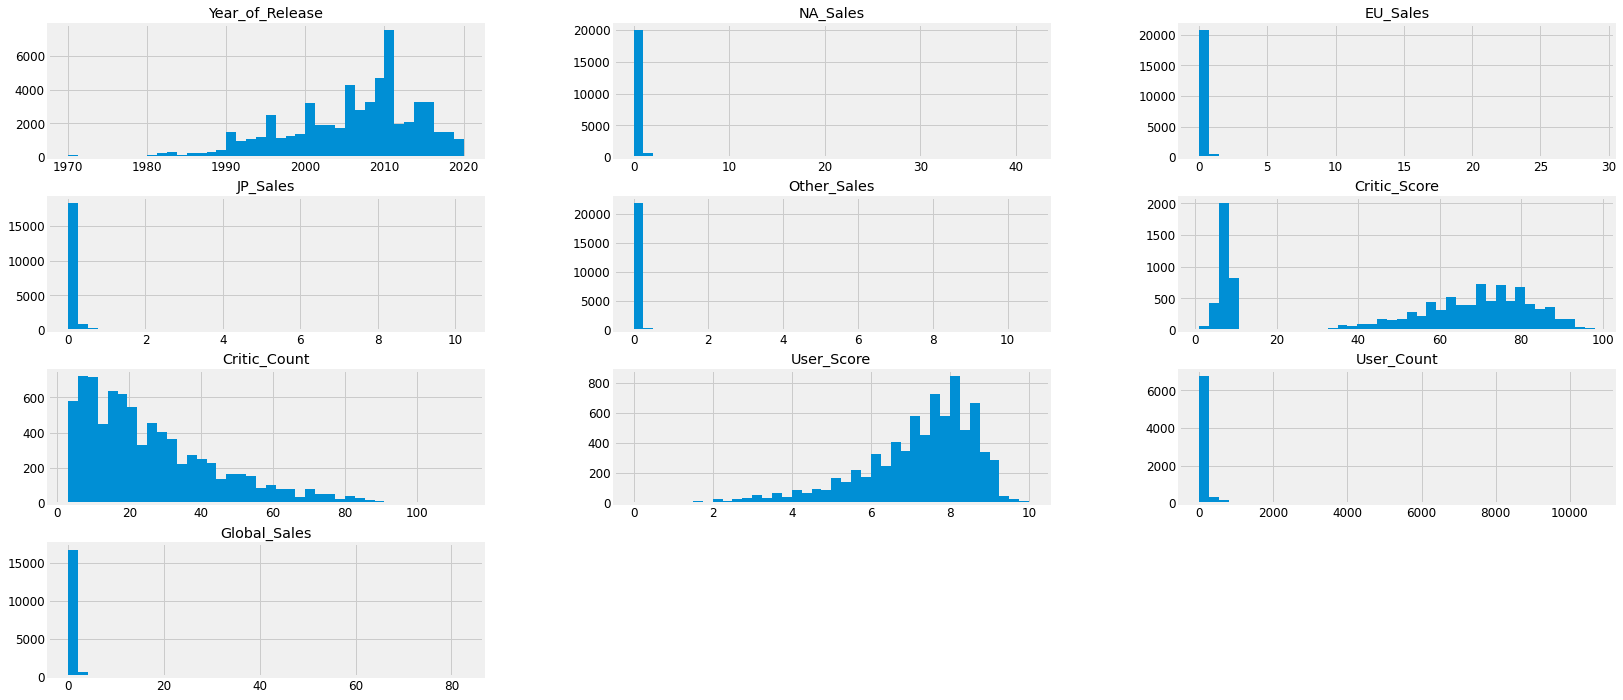

In [64]:
%matplotlib inline 
vgsales.hist(bins=40, figsize=(25,12))
plt.show()

## $$ \textbf{Pontuação de crítica e o impacto nas vendas globais} $$

> Aqui destaremos as plataformas mais conhecidas, portanto, mais relevantes em variáveis pra facilitar sua plotagem com matplotlib.
Observamos que muitos jogos podem não ter uma pontuação de críticos ou usuários. Optamos por ignorar esses videogames para esta exploração.

 >As pontuações dos críticos são classificadas de 0 a 100, enquanto as pontuações do usuário são classificadas de 0,0 a 10,0, tornando-as diretamente comparáveis.

VISUALIZAÇÃO DE DAOOS DA PONTUAÇÃO DE CRÍTICA


In [65]:
vgsales = vgsales.fillna(np.nan)
print ('Descrição \n',vgsales.Critic_Score.describe())

Descrição 
 count    11463.000000
mean        51.043802
std         30.398051
min          1.000000
25%          8.600000
50%         63.000000
75%         76.000000
max         98.000000
Name: Critic_Score, dtype: float64


In [66]:
crit = vgsales[['Critic_Score']].value_counts()
freq  = vgsales[['Critic_Score']].value_counts(normalize = True)*100
dataset = pd.DataFrame( { "Frequencia": crit, "Percentual(%)": freq})
dataset.rename_axis("Pontuação da Crítica", axis = "columns",inplace= True )
dataset

Pontuação da Crítica,Frequencia,Percentual(%)
Critic_Score,,
70.0,256,2.233272
71.0,254,2.215825
75.0,245,2.137311
78.0,240,2.093693
73.0,238,2.076245
...,...,...
2.4,1,0.008724
2.2,1,0.008724
1.9,1,0.008724


VISUALIZAÇÃO DE DADOS DE CRÍTICA DE USUÁRIO

In [67]:
vgsales.User_Score.describe()

count    7782.000000
mean        7.148047
std         1.508067
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max        10.000000
Name: User_Score, dtype: float64

In [148]:
crit = vgsales[['User_Score']].value_counts()
freq  = vgsales[['User_Score']].value_counts(normalize = True)*100
usuario = pd.DataFrame( { "Frequencia": crit, "Percentual(%)": freq})
usuario.rename_axis("Pontuação da Crítica de usuário", axis = "columns",inplace= True )
usuario

Pontuação da Crítica de usuário,Frequencia,Percentual(%)
User_Score,,
7.8,325,4.176304
8.0,316,4.060653
8.2,283,3.636597
8.5,263,3.379594
7.5,260,3.341043
...,...,...
1.3,2,0.025700
1.5,2,0.025700
1.9,2,0.025700


Podemos ver que a pontuação dos críticos e dos usuários tem uma inclinação negativa, com a pontuação dos usuários tendo uma inclinação negativa maior. Isso ocorre porque os usuários tendem a estar mais dispostos a dar pontuações mais baixas, pois a pontuação mínima para críticos é 13 e a mínima para usuários é 0.

Também podemos ver padrões interessantes, especialmente com pontuações de usuários, certos números são fortemente favorecidos. Inteiros como 6,0, 7,0 e 8,0 tendem a ser dados com mais frequência do que outros. Curiosamente, 7,8 é o modo de pontuação do usuário, apesar de não ser um número inteiro.

Podemos ver que, em geral, os jogos que venderam mais globalmente receberam pontuações mais altas de Críticos e Usuários. Curiosamente, as distribuições são mais inclinadas negativamente para os críticos do que para os usuários.

Podemos que temos outlier de jogos de grande faturamento com crítica por entre 7 e 8 , com isso inferimos que a qualidade do game e sua recepção pode também não condizer com sua lucratividade, tendo em vista outros fatores como : 
* Jogo mais aguardado
* Fan service 
* Nolstagia

Isso ainda vale para jogos menos populares?

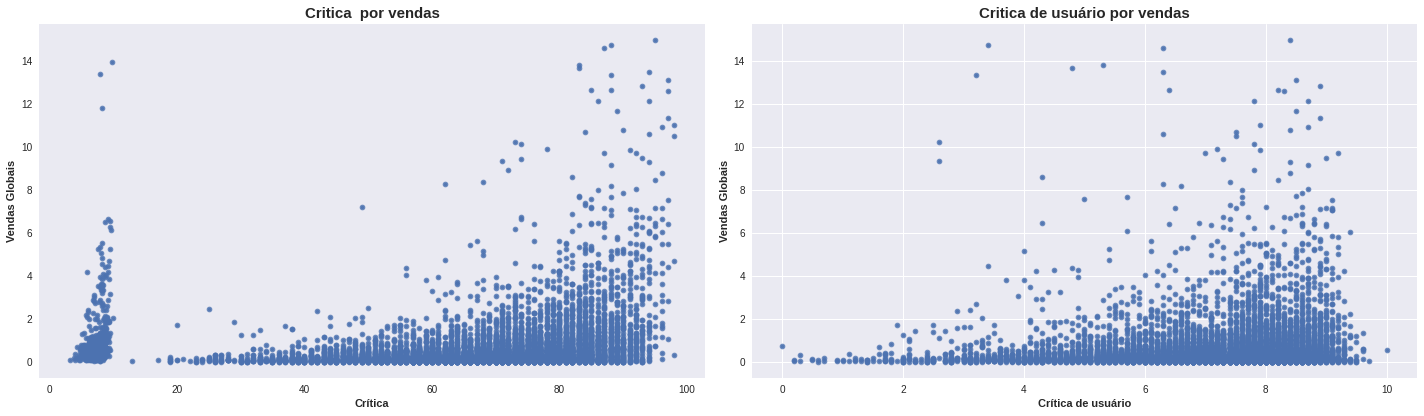

In [185]:
# Scatter graph of Critic Score and Global Sales. Uncapped

plt.style.use('seaborn')
fig, ax = plt.subplots(1, 2, figsize=(20,6))
data = vgsales[vgsales.Global_Sales <= 15]
y = data[['Global_Sales']]
x1 = data[['Critic_Score']]
x2 = data[['User_Score']]


ax[0].scatter(x1, y, cmap ='YlOrBr' , linewidth = 2.5, alpha = 0.8, s = 10)
ax[0].set_title("Critica  por vendas", fontweight = 'bold', size = 15)
ax[0].set_ylabel("Vendas Globais", fontweight = 'bold')
ax[0].set_xlabel("Crítica", fontweight = 'bold')
ax[0].grid()



ax[1].scatter(x2, y,linewidth = 2.5, alpha = 0.8, s = 10, cmap ='Spectral')
ax[1].set_title("Critica de usuário por vendas", fontweight = 'bold', size = 15)
ax[1].set_ylabel("Vendas Globais", fontweight = 'bold')
ax[1].set_xlabel("Crítica de usuário", fontweight = 'bold')
plt.tight_layout()

plt.show()


## $$\textbf{Analise individual de popularidade e vendas por Plataforma - TOP 20} $$

In [189]:
PC ,Wii, PS3 ,PS4 = vgsales[vgsales['Platform'] == 'PC'], vgsales[vgsales['Platform'] == 'Wii'],  vgsales[vgsales['Platform'] == 'PS3'],  vgsales[vgsales['Platform'] == 'PS4']
DS ,X360, PSP ,XOne = vgsales[vgsales['Platform'] == 'DS'], vgsales[vgsales['Platform'] == 'X360'],  vgsales[vgsales['Platform'] == 'PSP'] ,  vgsales[vgsales['Platform'] == 'XOne']
PS2 ,DS_3  = vgsales[vgsales['Platform'] == 'PS2'], vgsales[vgsales['Platform'] == '3DS']


Avaliaremos os 20 melhores jogos mais bem avaliados pela crítica , no entanto, certos jogos podem ser disponíveis em mais de 1 plataforma . Logo torna-se mais fácil trabalhar filtrando a platarforma e conhecermos os 20 melhores jogos bem avaliados de acordo com sua plataforma de lançamento.
É comum os jogos serem lançados inicialmente para seus respectivos consoles e apos um período indeterminada ser anunciado lançamento para platarformas como PC. Devido a este conhecimento que achamos melhor filtrar essa análise de acordo com a plataforma

In [190]:
cmap = sns.cubehelix_palette(reverse=True)
azul = sns.cubehelix_palette(rot=-.4)
roxo = sns.color_palette("flare", as_cmap= False)
critica = 'Critic_Score'
usuario = 'User_Score'

In [191]:
def topgames(game,critica):
  game2 = game.set_index('Name') # AVALIANDO JOGOS DE PC
  top_games = game2[critica].sort_values(ascending=False)
  top_games = top_games[:20]
  top_games.sort_values(ascending=True, inplace=True) 
  plt.figure(figsize=(25,9))
  plt.title("Top 20 Games mais bem avaliados pela crítica", size=25, fontname="Times New Roman",fontweight="bold",)
  ay = top_games.plot.barh(x= critica, y='Name', color = cmap)
  plt.xlabel(critica, size=20)
  plt.ylabel("Título", size=20)
  ay.set(xlim=(8, 10))
  if critica == 'Critic_Score':
    ay.xaxis.set_ticks(np.arange(0, 110, 25))
  else:
    ay.xaxis.set_ticks(np.arange(0, 12, 2.5))

  for tick in ay.xaxis.get_major_ticks():
      tick.label.set_fontsize(18)
  for tick in ay.yaxis.get_major_ticks():
      tick.label.set_fontsize(18)
      
  for i, v in enumerate(top_games):
      ay.text(v+.05, i-.15, str(v)[:4], fontsize=16)

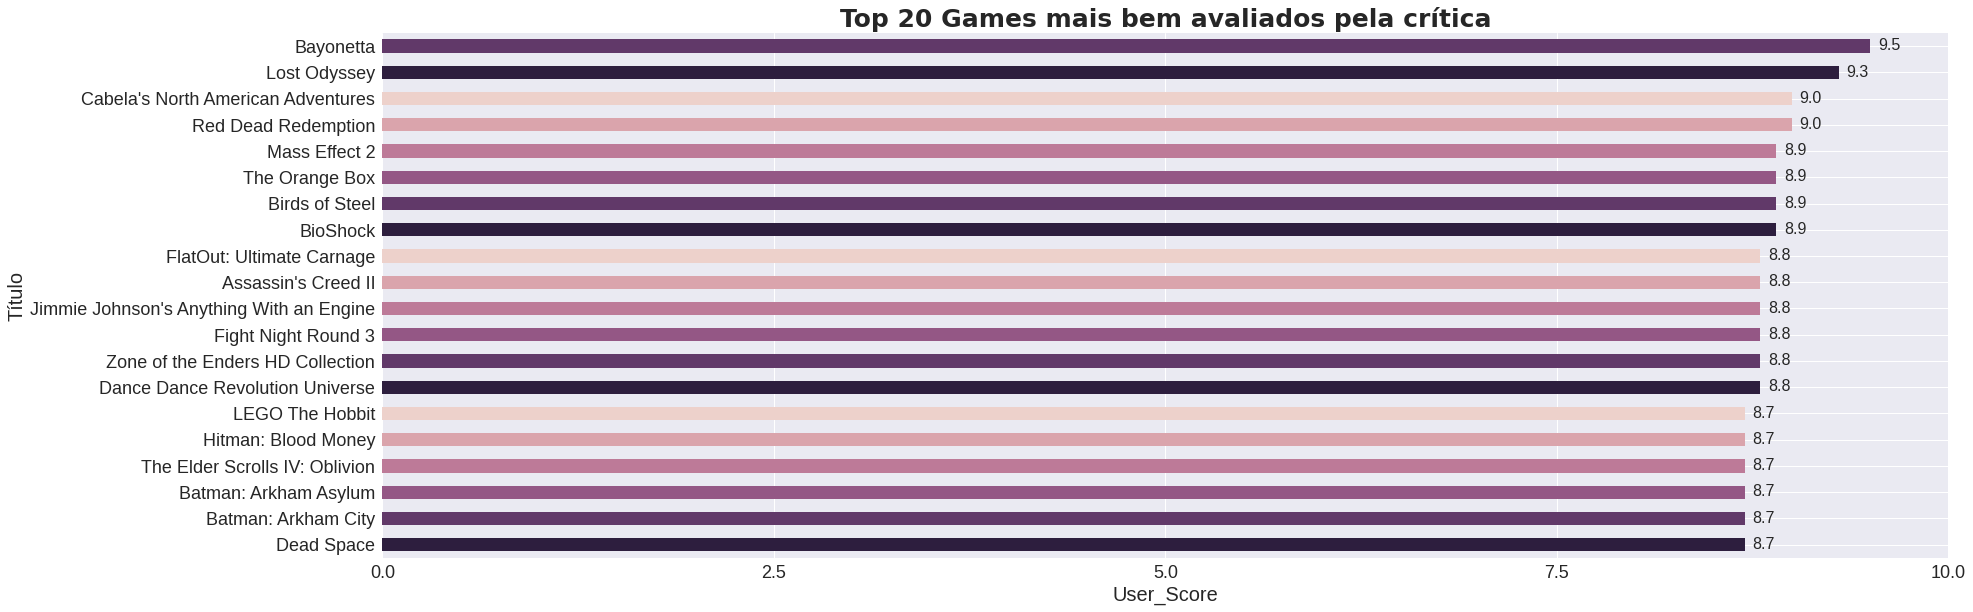

In [193]:
topgames(X360,usuario)

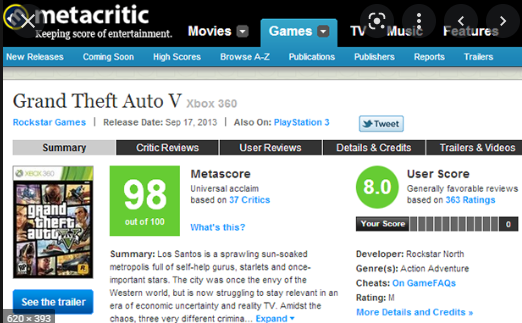

Grand Theft Auto V foi um dos jogos mais bem avaliados pela crítica , lançado em 2013 e ainda até hoje consta como uns dos melhores jogos ja feito pela Rockstar pela empresa Take-Two- Interact . Seu sucesso foi tão global que atualmente hoje é liberado para todas as plataformas desde da geração do PS3 e Xbox360.

Premiações ganhadas :

* VGX - Melhor Trilha Sonora (2013)
* BAFTA  Video Game Award - Melhor Multiplayer(2014)
* VGX - Melhor Jogo do ano (2013)
* BAFTA Video Game Award- Melhor Design (2013)
* BAFTA Video Game Award- Jogo Britânico (2013)
* VGX -Jogo mais aguardado (2013)
* The Game Award para melhor masterização (2014)

Além de uma analise de melhor avaliação pela crítica, achamos válido também uma uma análise do melhor valor da faturamento por plataforma.

In [201]:
def topfaturamento(game):
  game2 = game.set_index('Name') # AVALIANDO JOGOS DE PC
  top_games = game2['Global_Sales'].sort_values(ascending=False)
  top_games = top_games[:20]
  top_games.sort_values(ascending=True, inplace=True) 
  
  plt.figure(figsize=(20,8))
  plt.title("Top 20 Games mais bem lucrativos do mercado", size=25, fontname="Times New Roman",fontweight="bold",)
  ay = top_games.plot.barh(x=critica, y='Name', color = cmap)
  plt.xlabel("Vendas Globais", size=20)
  plt.ylabel("Título", size=20)
  ay.set(xlim=(8, 10))
  ay.xaxis.set_ticks(np.arange(0, 30, 5))

  for tick in ay.xaxis.get_major_ticks():
      tick.label.set_fontsize(18)
  for tick in ay.yaxis.get_major_ticks():
      tick.label.set_fontsize(18)
      
  for i, v in enumerate(top_games):
      ay.text(v+.05, i-.15, str(v)[:4], fontsize=16)

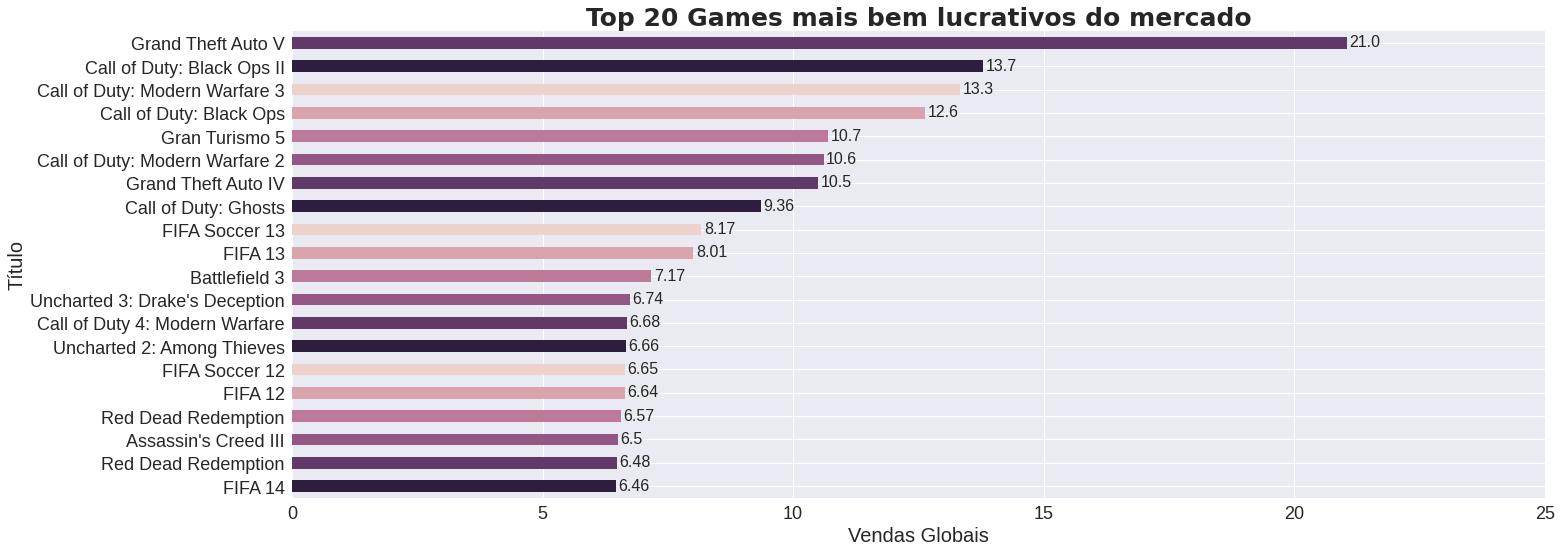

In [202]:
topfaturamento(PS3)

In [206]:
vgsales.query('Name == "Grand Theft Auto V" ') # GTA V É UM MODELO DE JOGO LUCRATIVO E BEM AVALIADO 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,97.0,50.0,8.2,3994.0,Rockstar North,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,97.0,58.0,8.1,3711.0,Rockstar North,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,97.0,66.0,8.3,2899.0,Rockstar North,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,97.0,14.0,7.9,764.0,Rockstar North,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,96.0,57.0,7.9,3756.0,Rockstar North,M,1.17


## $$ \textbf{Analise de Gê$$nero em relação as outras features} $$

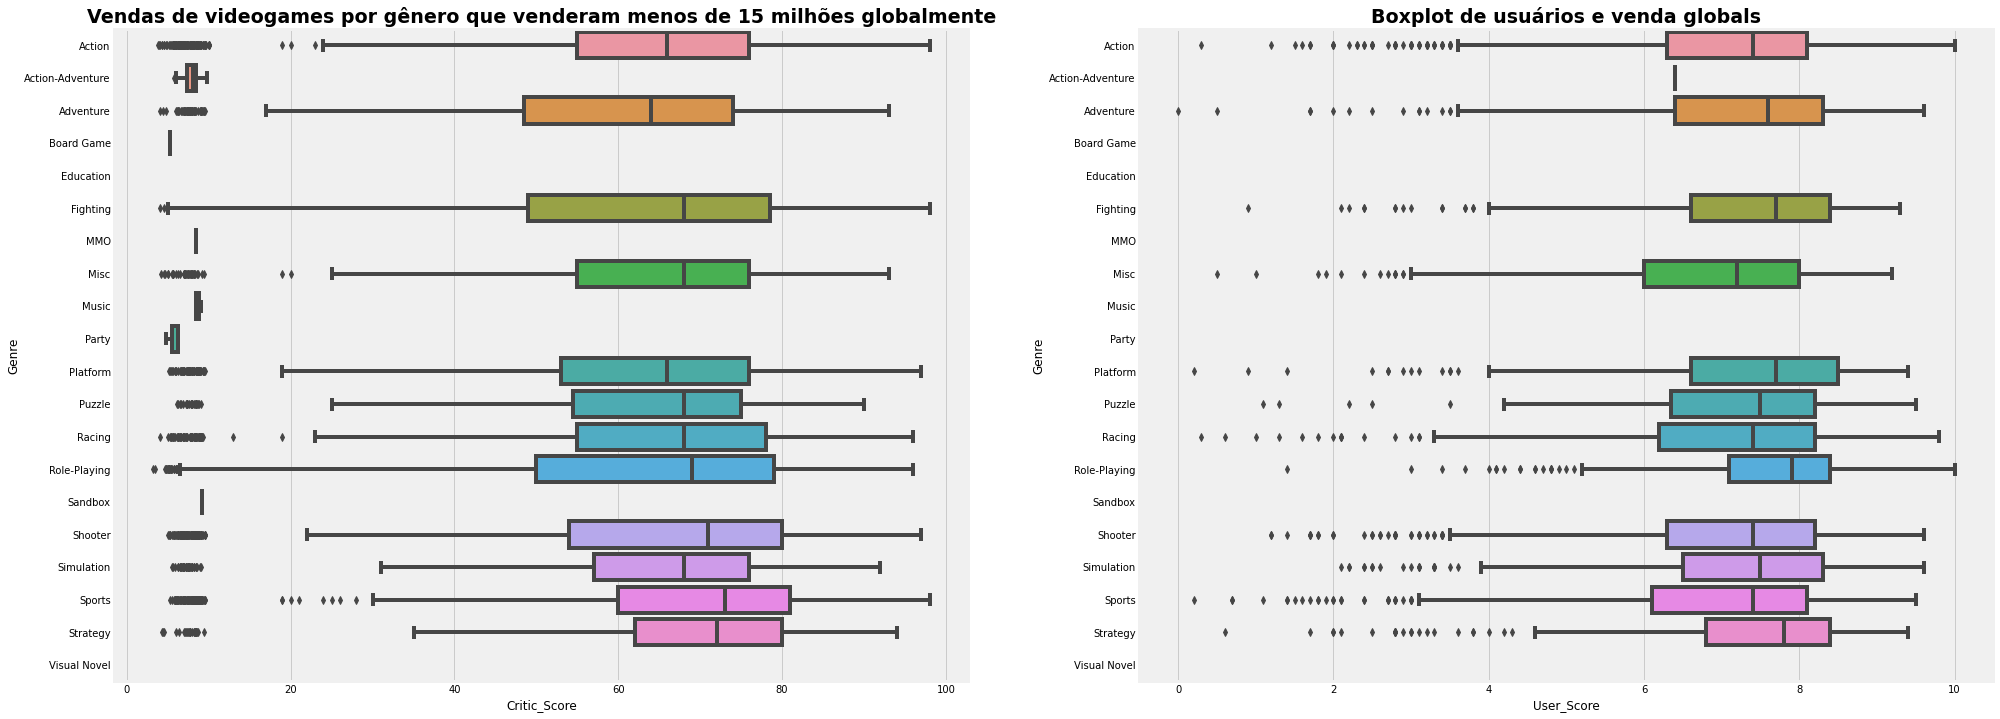

In [ ]:
# GRÁFICO DE DISPERSÃO COMPARANDO AS DUAS CRÍTICAS E AQUI VERIFICAMOS AMBAS CRÍTICAS SE ASEMELHAM PARA VALORES 

fig, axes = plt.subplots(1, 2, figsize=(30,12))

sns.boxplot(data=vgsales[vgsales.Global_Sales <= 15], y= 'Genre', x= 'Critic_Score', order=sorted(vgsales.Genre.dropna().unique()), ax=axes[0])
axes[0].set_title("Vendas de videogames por gênero que venderam menos de 15 milhões globalmente",fontname="Arial Black",fontweight="bold", size=19)

axes[1].set_title("Boxplot de usuários e venda globals",fontname="Arial Black",fontweight="bold", size=19)
sns.boxplot(data=vgsales[vgsales.Global_Sales <= 15], y='Genre', x='User_Score', order=sorted(vgsales.Genre.dropna().unique()), ax=axes[1])

> Existem algumas tendências gerais que podemos ver tanto nas pontuações dos críticos quanto nas pontuações dos usuários.

> Jogos de aventura tendem a receber pontuações piores para os críticos, mas acima da média para os usuários.

> Os RPGs tendem a obter pontuações altas de ambos os públicos (e um spread menor notável no IQR).

> Os esportes tendem a obter pontuações de usuários um pouco mais baixas, mas ficam acima da média para os críticos.

Com isso, vemos que de fato alguns gêneros são mais ou menos favorecidos para certo público de crítica, no entanto, a mediana de ambos são bastantes semelhantes

### $$ \textbf{Qual Gênero mais demandado ?} $$

>Surge agora o interesse em saber nao momento a venda pelos jogos ou plataforma responsável pelo lançamento, mas podemos inferir gráficamente qual gênero de mais compra ( demandado) pelo público alvo )

>> Os videogames neste banco de dados são divididos em 12 gêneros diferentes. Essas caracterizações gerais de cada gênero são explicadas abaixo:

* Ação - Desafios baseados em precisão e reação.
* Aventura - Exploração e uma narrativa guiada pela história. Os quebra-cabeças também costumam ser incorporados.
* Fighting - Combate entre normalmente dois jogadores onde são frequentemente necessárias entradas técnicas únicas.
* Plataforma - O movimento, como pular e escalar, é usado para atravessar um ambiente.
* Puzzle - Resolução de problemas e vários desafios lógicos. Muitas vezes incorporado em outros gêneros.
* Corrida - Conduzindo algum meio de transporte contra outros ou contra o tempo
* Role-playing - Sistemas baseados em progressão onde um personagem do jogador se torna mais forte, muitas vezes através de uma história.
* Shooter - Armamento de longo alcance, mais comumente armas, em combate para causar dano aos oponentes. Os oponentes podem ser outros jogadores ou oponentes controlados pela IA.
* Simulação - Sistemas que visam simular a realidade (real ou fictícia).
* Esportes - Recriações de esportes, mas em um videogame.
* Estratégia - Jogabilidade baseada em planejamento habilidoso e cuidadoso para atingir um objetivo.
* Misc - Qualquer jogo que não se enquadre em nenhuma das categorias acima. Notavelmente, jogos de música e jogos de festa se enquadram nesta categoria

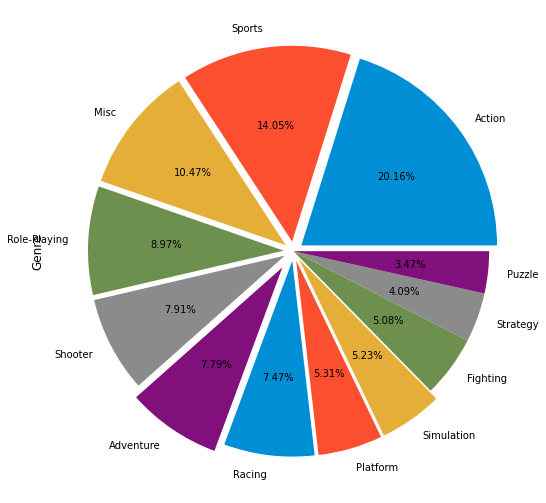

In [ ]:
plt.figure(figsize =(28,9))
data.Genre.value_counts().plot.pie(autopct = "%0.2f%%", explode = [0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.05,0.05,0,0,0])

In [ ]:
def autolabels(grupo) : # AQUI DEFINIMOS UMA FUNÇÃO PARA COLOCAR RÓTULOS NOS VALORES
  for i in grupo :
    h = i.get_height()
    ax.annotate('{} Mi'.format(h), 
                xy =(i.get_x()+i.get_width()/2,h),
                xytext = (0,8),
                textcoords = 'offset points' , 
                ha ='center', size = 14,
                fontweight="bold" 
                  )
# ESTA CÉLULA TEM COMO INTUITO CRIAR O DATASET RESPONSÁVEL POR VENDAS GLOBAIS AGRUPADOS POR GÊNERO E ORGANIZA-LOS DE FORMA DESCRESCENTE. 
gblSaleByGenreAll = vgsales[["Genre","Global_Sales"]].groupby(["Genre"]).sum().reset_index()
gblSaleByGenreAll = gblSaleByGenreAll.sort_values(by=["Global_Sales",'Genre'], ascending=False)

# CRIANDO TABELAS DE MÉDIAS DE CRÍTICA POR GENERO
Criticas = vgsales[["Genre","Critic_Score"]].groupby(["Genre"]).mean().reset_index()
User = vgsales[["Genre","User_Score"]].groupby(["Genre"]).mean().reset_index()
vendas_globais = list(gblSaleByGenreAll['Global_Sales'])
labels = list(gblSaleByGenreAll['Genre']) 

criticbygenre = pd.merge(Criticas,User, on = ['Genre'], how = 'inner')
criticbygenre.sort_values(by=['Critic_Score','User_Score','Genre'], ascending = False)

,Genre,Critic_Score,User_Score
17,Sports,56.085260,7.117194
0,Action,52.759963,7.109759
12,Racing,49.612911,7.111945
5,Fighting,49.533989,7.313123
16,Simulation,49.029955,7.208278
15,Shooter,49.000076,7.087797
7,Misc,46.668493,6.853728
13,Role-Playing,42.927155,7.652996
18,Strategy,40.696768,7.358545
10,Platform,39.923742,7.428337


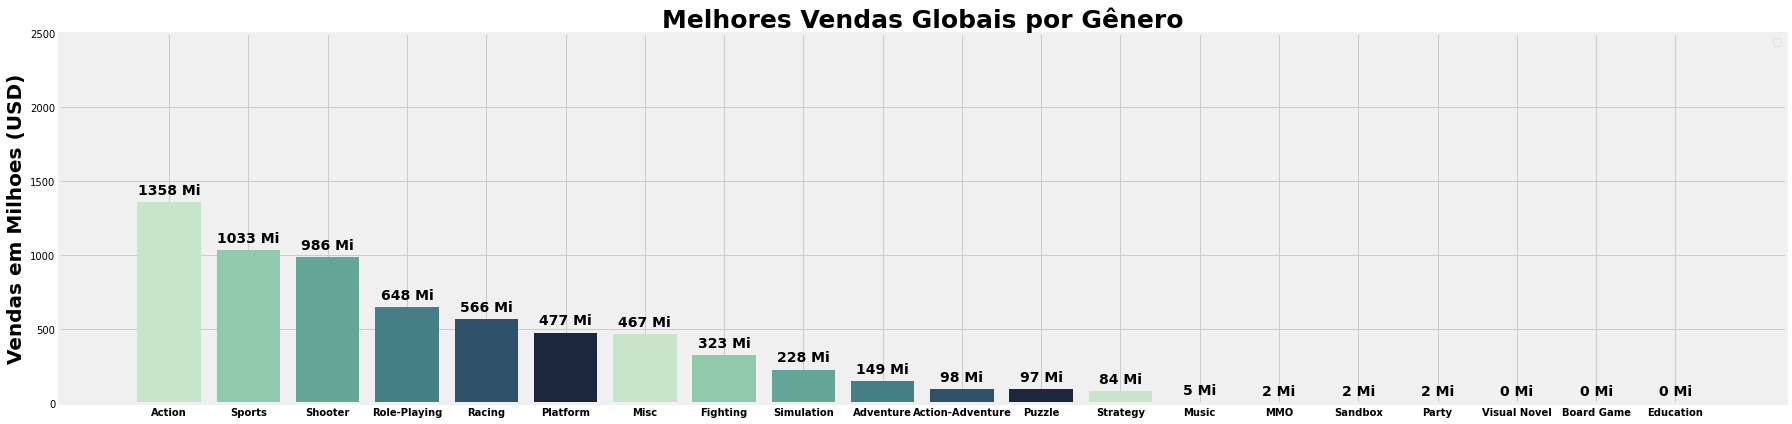

In [ ]:
# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in vendas_globais :  
  vendas_globais[a] = round(vendas_globais[a])
  a +=1
# POR FIM, COM ESCOPO DE AVALIARMOS GRÁFICAMENTOS,USAMOS A INTESIDADE DE COR PARA MÉTRICA DE MAIOR VALOR DE VENDA DE FORMA DESCRESCENTE
x = np.arange(len(labels))
fig, ax = plt.subplots(1, figsize=(25,6))
width = 0.8
rects1 = ax.bar(x , vendas_globais, width, color = azul )
ax.set_xticks(x)
ax.set_xticklabels(labels,fontweight="bold",size = 10)
ax.set_ylim([0,2500])
plt.ylabel('Vendas em Milhoes (USD)',fontweight="bold",size = 20)
ax.legend()
ax.set_title("Melhores Vendas Globais por Gênero",fontname="Times New Roman",fontweight="bold", size=25)
autolabels(rects1)
fig.tight_layout()
plt.grid(True)
plt.show()


 > Assim conseguimos ver que Ação e Esportes são os dois gêneros mais vendido dentre um período de 30 anos e jogos de Estratégia e Quebra cabeças são os 2 gêneros menos vendidos.

 1.º Conclusão => Og gênero alvo para uma Empresa iniciantes deve ser entre os 3 melhores mais bem vendidos de acordo com o gráfico

Outra maneira de verificar esse valores é através um mapa de correlação onde podemos subdividir as vendas por região agrupados por Gênero. 
O escopo desse mapa de correlação é entendermos qual região tem maior impacto no número de vendas em cada gênero mais requisitado.


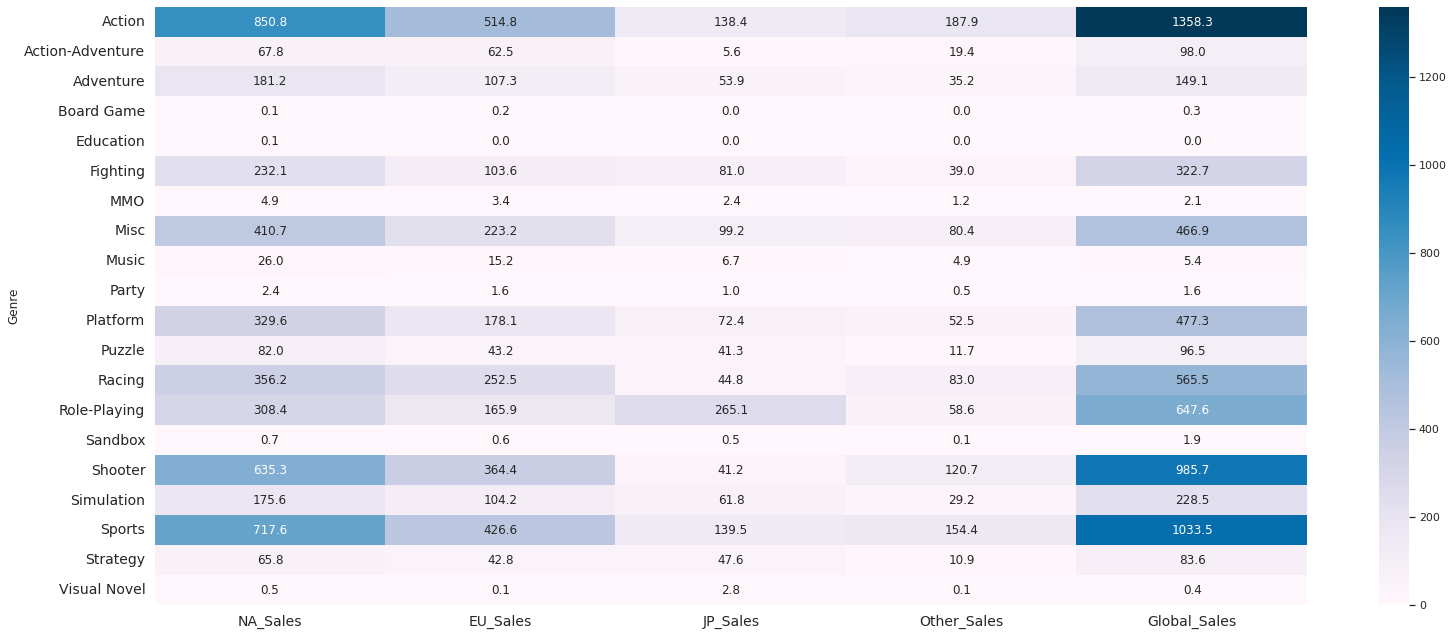

In [ ]:
comp_genre = vgsales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
plt.figure(figsize=(23, 11))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f', cmap = 'PuBu' )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#PERFIL DE USUÁRIO , COMPRA. VENDA E INTERESSE POR REGIÃO

## $$\textbf{Verificando anomalia nas vendas por gênero} $$ 

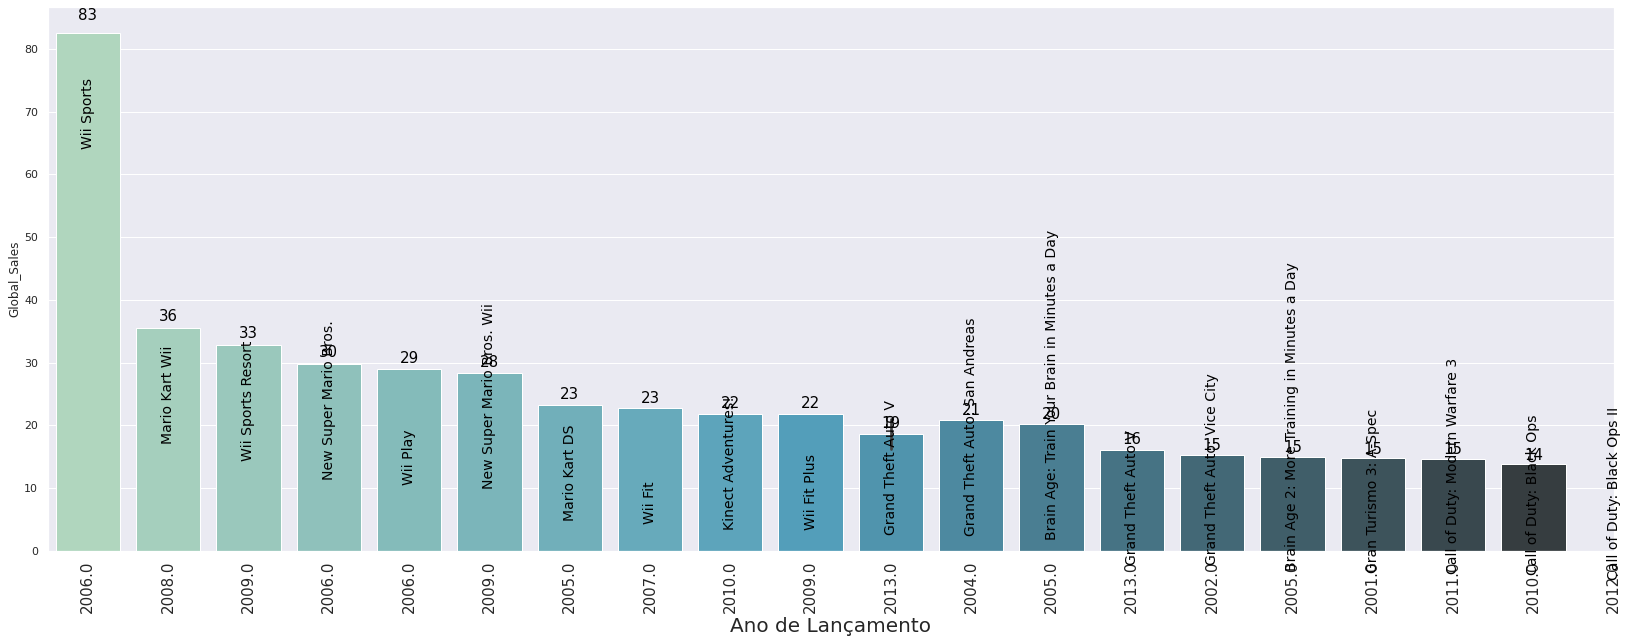

In [ ]:
# FILTRANDOS AS COLUNAS DE INTERESSE

top_game_sale = vgsales.head(20)
top_game_sale = top_game_sale[['Name', 'Year_of_Release', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)


name = top_game_sale['Name']
year = top_game_sale['Year_of_Release']
y = np.arange(0, 20)
# PLOTANDOS OS VALORES
plt.figure(figsize=(25, 10))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale, palette="GnBu_d")
index = 0
for i in g.patches:
  g.annotate(round(i.get_height()),
                (i.get_x()+ i.get_width()/ 2 ,1.02*i.get_height()),
                ha ='center', va ='baseline', fontsize =15 ,
                color = 'black', xytext=(0,3),
                textcoords ='offset points'
                )
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year_of_Release'], fontsize= 15, rotation=90)
plt.xlabel('Ano de Lançamento',fontsize = 20)
plt.show()

In [ ]:
vgsales.query('Name == "Wii Sports" ') # GTA V É UM MODELO DE JOGO LUCRATIVO E BEM AVALIADO 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0,Nintendo,E,82.54


Jogos de Wii Nintendo é o que se caracteriza de maior preço de venda globalmente

## $$\textbf{Analisando a região mais expressiva em vendas} $$

In [207]:
top_sale_reg = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "Região", 0: "Vendas"})
top_sale_reg

,Região,Vendas
0,NA_Sales,5316.59
1,EU_Sales,3004.21
2,JP_Sales,1617.64
3,Other_Sales,983.00


Como possívelmente esperado o ranking de região ficou como :

 * 🥇  América do Norte
 * 🥈  Europa
 * 🥉 Japão e Outros locais

([<matplotlib.patches.Wedge at 0x7f7a6476f2d0>,
 [Text(-1.1989688126573843, 0.049737171963656505, 'NA_Sales'),
  Text(0.8097951854505154, -0.8165364398611771, 'EU_Sales'),
  Text(0.9949724181825231, 0.5963471196006755, 'JP_Sales'),
  Text(0.3208619884844171, 1.104331283784819, 'Other_Sales')],
 [Text(-0.6993984740501408, 0.029013350312132962, '48.7%'),
  Text(0.45771032221116087, -0.4615205964432739, '27.5%'),
  Text(0.5661049965521251, 0.339300947359005, '14.8%'),
  Text(0.18135677609988793, 0.6241872473566366, '9.0%')])

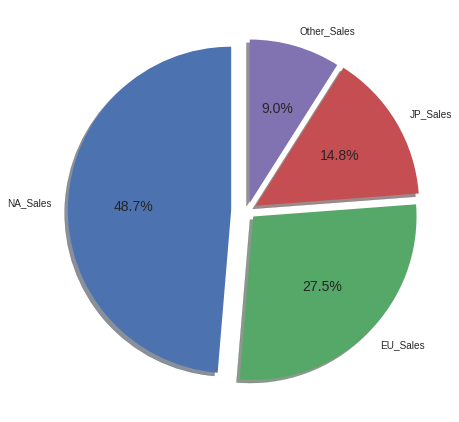

In [208]:
labels , sizes = top_sale_reg['Região'] , top_sale_reg['Vendas']

plt.figure(figsize=(25, 7))
explode = [0.1, 0.05 , 0.06, 0.05 ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode =explode , shadow=True, startangle=90)

2º Conclusão relevantes ▶ : O desenvolvimento de um jogo tem maior chance de lucro caso seja direcionado pra America do Norte ou Europa

## $$\textbf{Verificando o período mais expressivo em lucratividade} $$ 

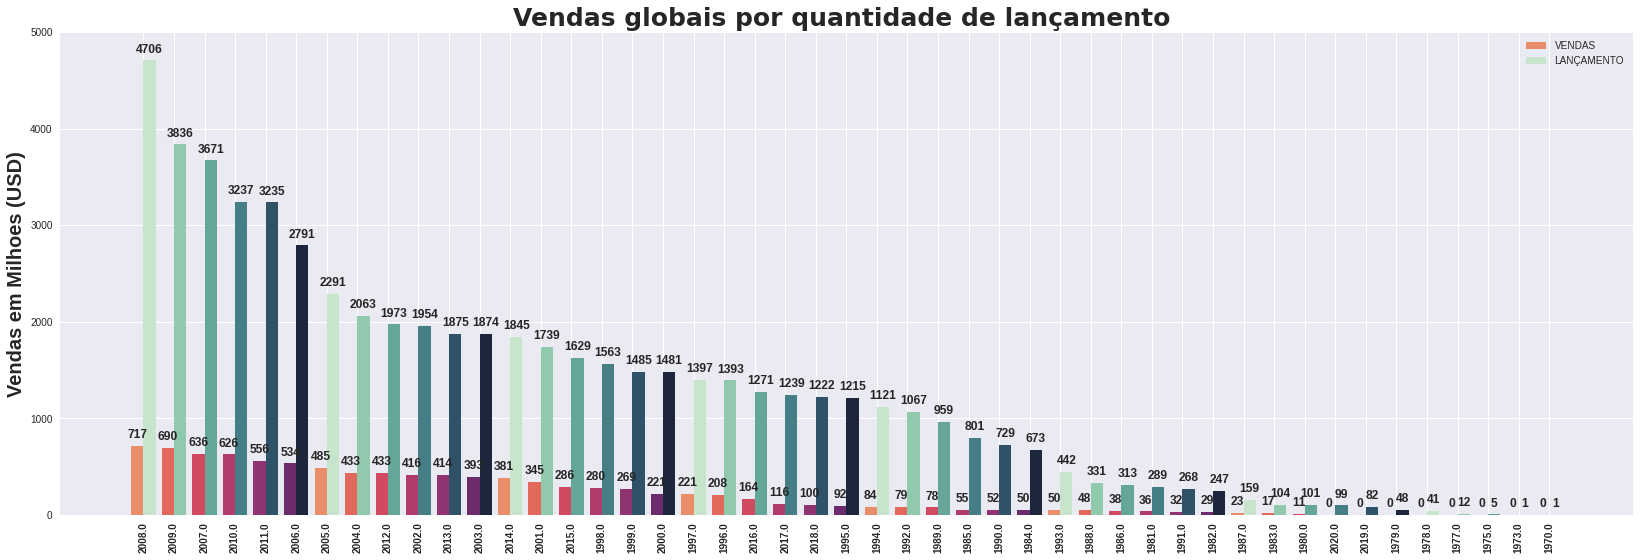

In [210]:
def labels(grupo) : # AQUI DEFINIMOS UMA FUNÇÃO PARA COLOCAR RÓTULOS NOS VALORES
  for i in grupo :
    h = i.get_height()
    ax.annotate('{}'.format(h), 
                xy =(i.get_x()+i.get_width()/2,h),
                xytext = (0,8),
                textcoords = 'offset points' , 
                ha ='center', size =12,
                fontweight="bold" 
                  )
#FILTRANDO A TABELA ORIGINAL PARA AS COLUNAS DE INTERESSE
globalsalesperyear = vgsales[["Year_of_Release","Global_Sales"]].groupby(["Year_of_Release"]).sum().reset_index()
globalsalesperyear = globalsalesperyear.sort_values(by=["Global_Sales",'Year_of_Release'], ascending=False)
anos = list(globalsalesperyear['Year_of_Release'])
vendas = list(globalsalesperyear['Global_Sales'])
x_anos = np.arange(len(anos))
colors = ['darkviolet','blue','mediumblue','mediumturquoise','turquoise','aqua','cyan','aqua','cyan','cyan','cyan','cyan']
#FILTRANDO A TABELA ORIGINAL PARA AS COLUNAS DE INTERESSE
count_year = vgsales[["Year_of_Release","Name"]].groupby(["Year_of_Release"]).count().reset_index()
count_year = count_year.sort_values(by=["Name",'Year_of_Release'], ascending=False)
release = list(count_year['Name'])
release_year = list(count_year['Year_of_Release'])


# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in vendas :  
  vendas[a] = round(vendas[a])
  a +=1
 # PLOTAGEM DO GRÁFICO , SETANDO INFORMAÇÕES RELEVANTES
fig, ax = plt.subplots(figsize=(23,8))
width = 0.4
paint = ['salmon']
bar1 = ax.bar(x_anos- width/2, vendas, width, color = roxo, label = 'VENDAS')
bar2 = ax.bar(x_anos +width/2, release, width, color = azul,label = 'LANÇAMENTO')
ax.set_xticks(x_anos)
ax.set_xticklabels(anos,fontweight="bold",size = 10)
ax.set_ylim([0,5000])
plt.ylabel('Vendas em Milhoes (USD)',fontweight="bold",size = 20)
plt.xticks(rotation=90)
ax.legend()
ax.set_title("Vendas globais por quantidade de lançamento ",fontname="Times New Roman",fontweight="bold", size=25)
labels(bar1)
labels(bar2)

fig.tight_layout()

plt.show()

>Notamos que nos anos de 2008 e 2009 foram os anos de maior valor faturado para o se tratando do ano de lançamentos dos jogos. Dessa forma, entendemos que em relação ao mercado, esse período foi o mais 'aquecido' do entretenimento de jogos, entretanto os dados podem estar enviesados devido a quantidade de lançamentos por ano, verificamos agora essa proposta: 

>No segundo gráfico ja conseguimos justificar porque os anos de 2008 e  2009 tem maiores vendas globais. Conforme elucidado acima, tais anos mencionados foram os anos de maior número de lançamento e por consequência tende ter maiores valores de venda. Podemos ter uma relacionamento de Valor faturado no ano pela quantidade de lançamento pra sabermos em termos estatísticos, qual foi o melhor ano.

### $$\text{Gráfico em Tabela} $$

In [219]:
TABLE = pd.merge(count_year,globalsalesperyear,on=['Year_of_Release'], how = 'inner')
TABLE = TABLE.rename(columns = {"Name":"Quantidade"})
TABLE['EFICIÊNCIA'] = (TABLE['Global_Sales']/ TABLE['Quantidade'])
TABLE.sort_values('EFICIÊNCIA', ascending=False)

,Year_of_Release,Quantidade,Global_Sales,EFICIÊNCIA
38,1985.0,101,54.77,0.542277
39,1984.0,99,50.35,0.508586
40,1981.0,82,35.68,0.435122
42,1980.0,41,11.38,0.277561
13,2004.0,1739,433.26,0.249143
8,2005.0,1973,485.03,0.245834
36,1986.0,159,38.00,0.238994
6,2006.0,2291,534.01,0.233090
22,1998.0,1222,280.04,0.229165
5,2007.0,2791,636.29,0.227979


## $$ \textbf{Tabela em Gráfico}$$

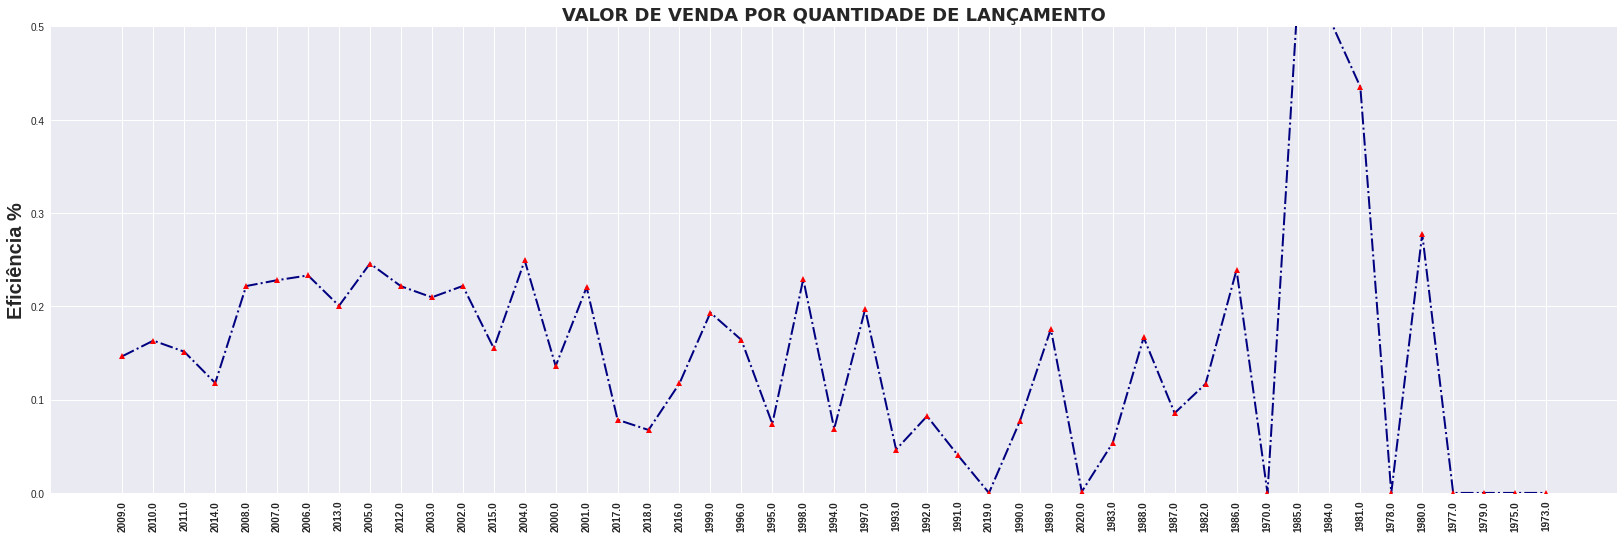

In [215]:
eficiencia = list(TABLE['EFICIÊNCIA'])
released = list(TABLE['Year_of_Release'])
glsales = list(TABLE['Global_Sales'])
# ARRENDONDAR OS VALORES PARA FACILITAR VISUALIZAÇÃO DO GRÁFICO 
a = 0
for i in glsales :
  glsales[a] = round(glsales[a])
  a +=1
  #PLOTANDO OS VALORES
fig, ax = plt.subplots(figsize=(25,8))
released_anos = np.arange(len(released))
line = ax.plot(released_anos,eficiencia, 
               color = 'navy',
               linewidth = 2,
               linestyle = 'dashdot',
               marker = '^',
               markersize = 6 ,
               mfc ='red',
               mec ='red'
               )

ax.set_xticks(released_anos)
ax.set_xticklabels(released,fontweight="bold",size = 10)
ax.set_ylim([0,0.5])
plt.ylabel('Eficiência %',fontweight="bold",size = 20)
plt.xticks(rotation=90)
ax.legend()
ax.set_title("VALOR DE VENDA POR QUANTIDADE DE LANÇAMENTO",fontname="Times New Roman",fontweight="bold", size=18)
#for (i ,valor) in enumerate(eficiencia, start = 0):
  #plt.text(x=released_anos[i],
           #y = valor + 3,
           #s = f'{valor}',
           #ha ='right'
           #)
plt.show()

# $$\textbf{Influência na Classificação indicativa nas vendas} $$

Uma breve explicação retirada do site do ESRB para cada classificação:

Pela Classificação oficial da ESRB - https://www.esrb.org/ratings-guide/ , segue seu glossário ;

* E =>( Everyone)  Conteúdo generalizado para todas as idades, contendo mínimo de fantasia, violências ou animações em cartoons.

* E10 => Conteúdo mais adequada para acima de 10 anos podendo conter fantasia , violência ou animações me cartons mais frequentes de intensidade mínima

* T => ( Teens ) Conteúdo mais adequado para acima de 13, podendo conter fantasia, humor, sangue e uso frequente de expressões linguísticas.

* M => ( Mature ) Conteúdo mais adequada para acima de 17 anos podendo conter intensa violência , sangue e uso inadequado de expressões linguísticas .

*  A => ( Adults only) Conteúdo adequado para adultos acima de 18 podendo conter prolongadas cenas de violência, apostas , sangue e cenas expressivamente sexualizadas .

* RP => ( Rating Pending ) Classificação ainda pendente.

Alguns menos comuns são explicados abaixo:

* EC - Primeira Infância. Conteúdo geralmente adequado para maiores de 3 anos. Não contém material que os pais considerem inapropriado.
* K-A - Crianças para Adultos. O nome anterior da categoria de classificação * * 'E' para 'Todos'.
* RP - Classificação pendente. O jogo ainda não recebeu uma classificação final. Substituído assim que a classificação for atribuída
K-A foi renomeado para E em 1998. EC também foi descontinuado em 2018 devido à falta de uso, pois E também era aplicável a títulos com a classificação EC. Assim, para nossa exploração e análise, estaremos rotulando esses jogos para ter a classificação E para ser consistente com as classificações modernas.
Também notamos que as classificações de jogos só foram introduzidas em 1994, então muitos jogos antes dessa era podem não ter uma classificação.


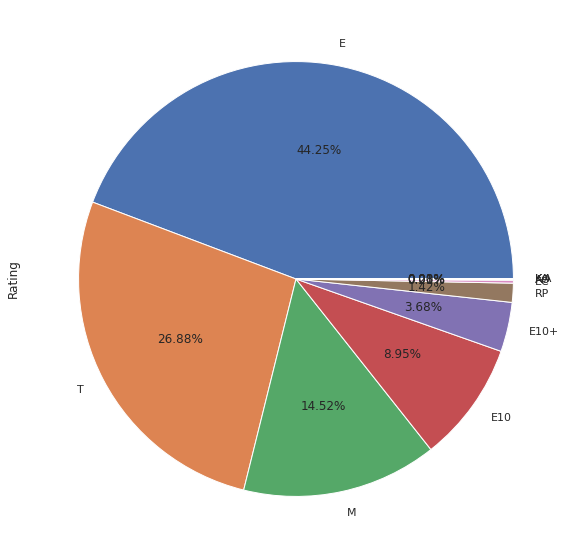

In [ ]:
plt.figure(figsize = (16,10))
vgsales.Rating.value_counts().plot.pie(autopct = "%0.2f%%")

In [220]:
vgsales.replace(['K-A', 'EC'], 'E', True)
vgsales.replace(['E10+'], 'E10', True)
vgsales.Rating.value_counts()

E      10507
T       6569
M       3572
E10     3210
RP       355
AO        20
KA         3
Name: Rating, dtype: int64

Existe diversos jogos com a classificação Adults Only em nosso banco de dados, 

In [ ]:
vgsales.loc[vgsales.Rating == "AO"]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating,Global_Sales
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,93.0,8.6,118.0,Rockstar North,AO,1.96
38454,Absolute Obedience,PC,2006.0,Misc,Jast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Langmaor,AO,NaN
42768,Cat Girl Alliance,PC,2008.0,Adventure,G-Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sekilala,AO,NaN
44025,Critical Point,PC,2002.0,Adventure,Peach Princess,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sweet Basil,AO,NaN
44128,Crystal Fantasy,PC,2009.0,Misc,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,AO,NaN
46656,Enzai - Falsely Accused - eine falsche Beschul...,PC,2006.0,Misc,Jast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Langmaor,AO,NaN
51057,ioi,PC,2008.0,Misc,Westwood Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Well, let us see...",AO,NaN
51058,ioi 2: The Return of ioi,PC,1999.0,Role-Playing,Idea Factory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stellar Stone LLC,AO,NaN
51802,Kana Little Sister,PC,2002.0,Adventure,G-Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D.O.,AO,NaN
53691,Manhunt 2,PC,2009.0,Action,Rockstar Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rockstar London,AO,NaN


In [ ]:
data.loc[data.Name == 'Grand Theft Auto: San Andreas']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,95.0,9.0,1588.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,93.0,8.6,118.0,Rockstar North,AO
2115,Grand Theft Auto: San Andreas,PC,2005.0,Action,Take-Two Interactive,0.00,0.93,0.00,0.04,93.0,8.9,1841.0,Rockstar North,M
10312,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,0.08,0.02,0.00,0.01,NaN,7.5,46.0,War Drum Studios,M


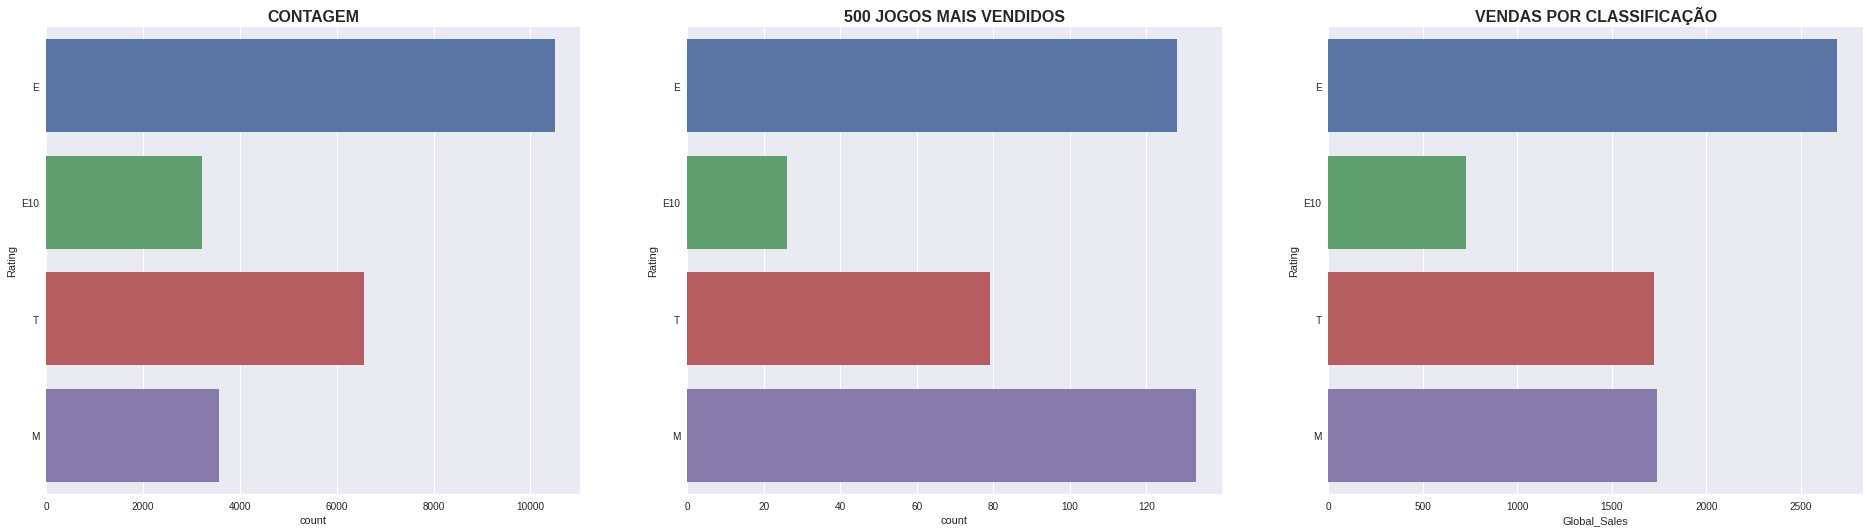

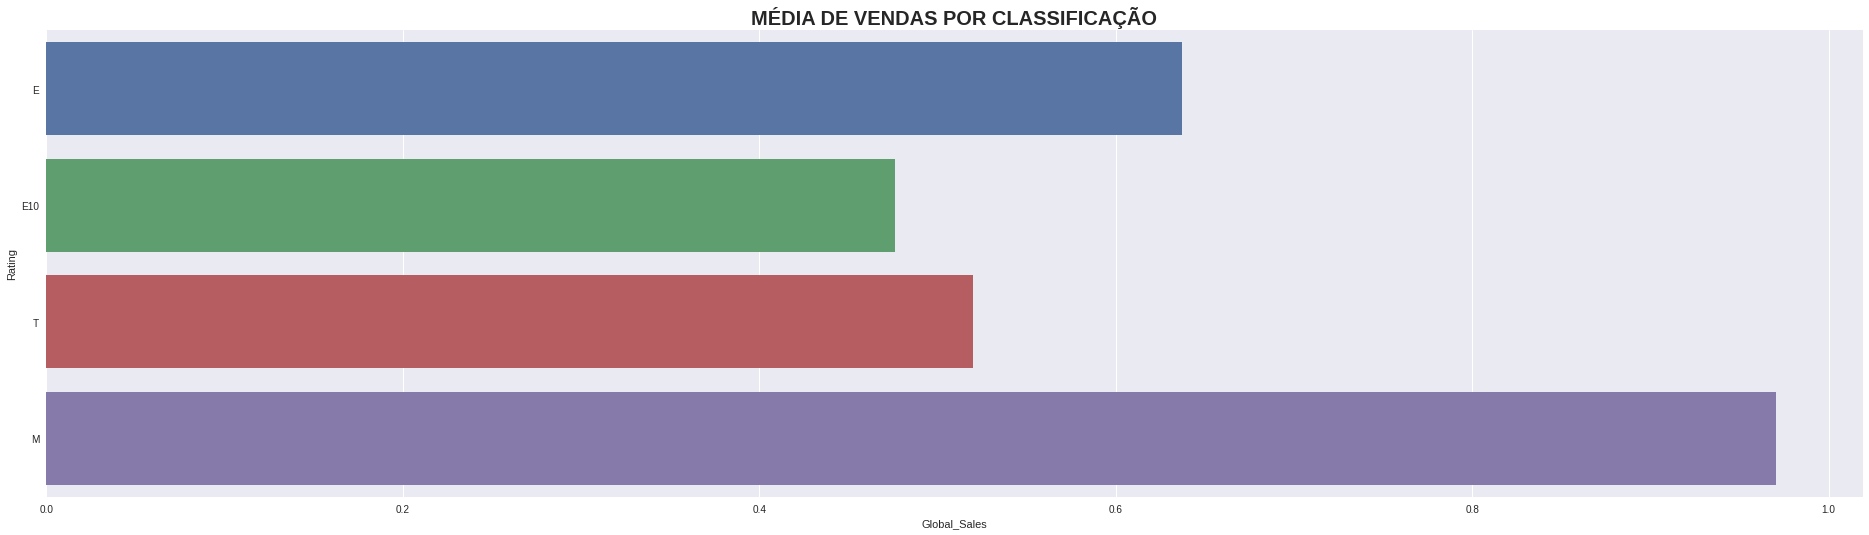

In [222]:
rating_order = ['E', 'E10', 'T', 'M',] #ORGANIZANDO NOSSOS DADOS
plt.figure(1, figsize = [29,8]) # TAMANHO DO PLOT GERAL
plt.subplot(1,3,1) #SUBDIVIDINDO NOSSO PLOT EM 3 GRÁFICOS

# CONTAGEM DE CADA CLASSIFICAÇÃO
plt.title("CONTAGEM",size = 16, fontweight = 'bold')
sns.countplot(data=vgsales, y='Rating', order=rating_order)

#CONTAGEM DE CADA CLASSIFICAÇÃO DAS 500 VENDAS MAIS CARAS
plt.subplot(1,3,2)
plt.title("500 JOGOS MAIS VENDIDOS",size = 16, fontweight = 'bold')
sns.countplot(data=vgsales.sort_values('Global_Sales', ascending=False)[:500], y='Rating', order=rating_order)

# VENDAS GLOBAIS POR CLASSIFICAÇÃO
plt.subplot(1,3,3)
plt.title("VENDAS POR CLASSIFICAÇÃO", size = 16, fontweight = 'bold')
sns.barplot(data=vgsales.groupby('Rating', as_index=False).sum(), x='Global_Sales', y='Rating', order=rating_order)

# MÉDIA DAS VENDAS GLOBAIS POR CLASSIFICAÇÃO 

plt.figure(figsize=(29,8))
plt.title("MÉDIA DE VENDAS POR CLASSIFICAÇÃO", size = 20, fontweight='bold')
sns.barplot(data=vgsales.groupby('Rating', as_index=False).mean(), x='Global_Sales', y='Rating', order=rating_order)

Jogos classificados para adultos têm um valor médio muito mais alto para Vendas Globais do que todas as outras classificações.

## $$\textbf{Comportamento da Classificação ao Gênero e Plataforma} $$

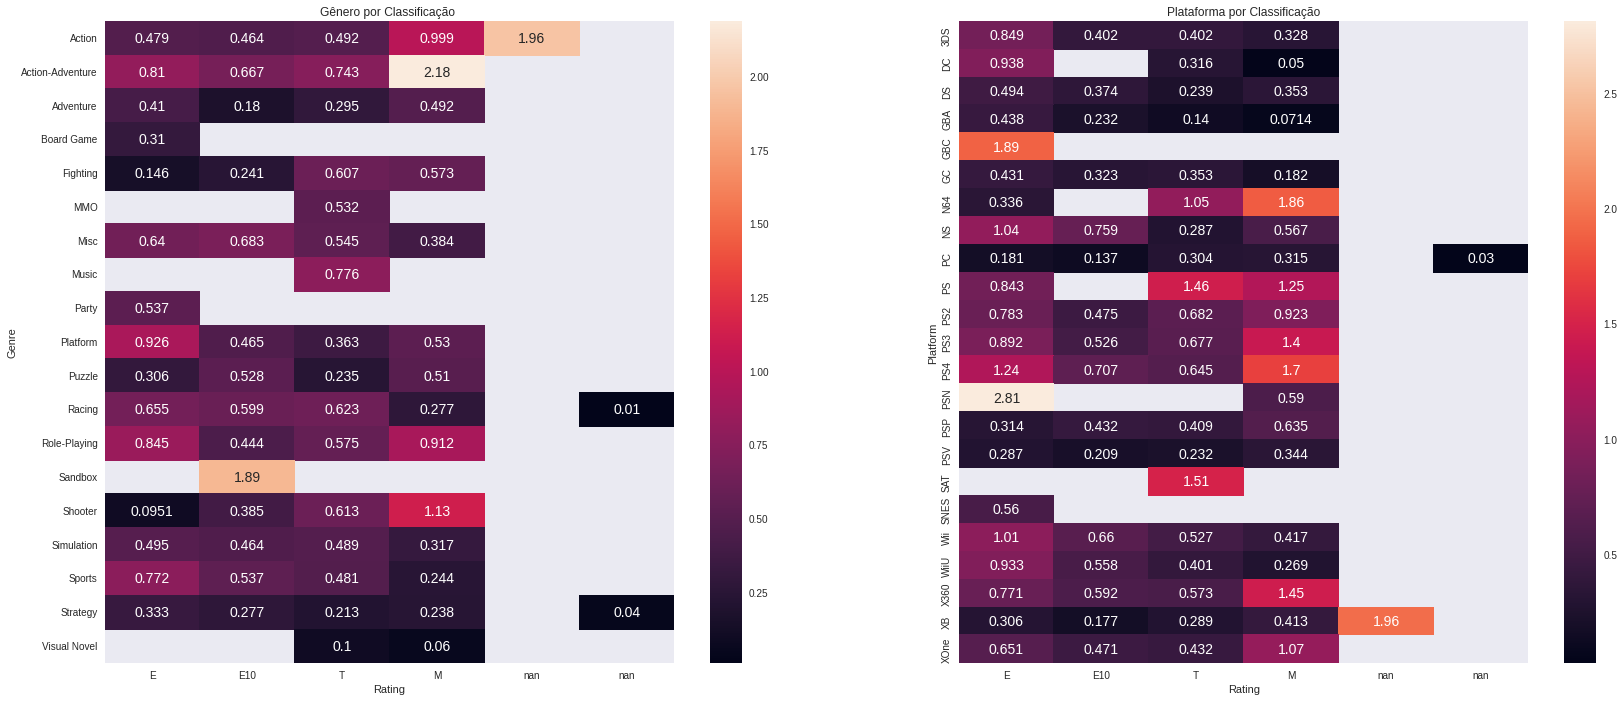

In [231]:
# Create a pivot table, we will drop platforms without sales data in 3 or less genres

global_sales_rating_platform = vgsales.pivot_table(index='Rating', columns='Genre', values='Global_Sales', aggfunc=np.mean)
global_sales_mean_rating_platform = vgsales.pivot_table(index='Rating', columns='Platform', values='Global_Sales', aggfunc=np.mean)

global_sales_rating_platform.index = pd.CategoricalIndex(global_sales_rating_platform.index, categories=rating_order)
global_sales_rating_platform.sort_index(level=0, inplace=True)

global_sales_mean_rating_platform.index = pd.CategoricalIndex(global_sales_mean_rating_platform.index, categories=rating_order)
global_sales_mean_rating_platform.sort_index(level=0, inplace=True)

# Heat map of genres & platform
fig, axes_rating_platform_heatmap = plt.subplots(1, 2, figsize=(25,11))

axes_rating_platform_heatmap[0].set_title("Gênero por Classificação ")
sns.heatmap(data=global_sales_rating_platform.transpose(), ax=axes_rating_platform_heatmap[0], annot=True, fmt=".3g")

axes_rating_platform_heatmap[1].set_title("Plataforma por Classificação")
sns.heatmap(data=global_sales_mean_rating_platform.transpose(), ax=axes_rating_platform_heatmap[1], annot=True, fmt=".3g")


* Os jogos maduros  >> Playstation  e +/- Xbox.

* Os jogos para adolescentes >>  seguem uma tendência semelhante aos jogos para adultos, mas em menor grau. As vendas na classificação de adolescentes são muito mais próximas, com menos consoles nos extremos, mas ainda tendem a vender um pouco melhor nos consoles Playstation.

* Os jogos classificados como E e E10+ >> Se destacam em Wii e o DS (Nintendo) vendem razoavelmente na maioria dos consoles. O PC notavelmente não vende jogos com classificação E tão bem quanto qualquer outro console, especialmente quando comparado com a métrica média de vendas globais.

> 3 º Conclusão ▶ A Sony e a Microsoft tendem a comercializar a linha de consoles Playstation e Xbox para **públicos mais velhos**, enquanto a Nintendo tende a comercializar seus consoles para ter um **apelo muito mais amplo**.



### $$ \textbf{Resumo e Conclusão} $$
Em resumo, exploramos muitas facetas diferentes do mercado de videogames:

* Região: a América do Norte tem as vendas mais altas de todas as regiões
* Plataforma: PS2 e Xbox 360 têm as maiores vendas globais
* Multiplataforma: videogames com lançamentos multiplataforma podem vender de forma muito diferente dependendo do tipo de jogo.
* Gênero: O gênero de ação tem o maior total de vendas, mas por média de vendas, o gênero de plataforma tem o melhor
Gênero e plataforma: Certos gêneros têm um desempenho muito melhor nas plataformas cetrain. Mais notavelmente, videogames de plataforma no Nintendo Gameboy e NES, bem como jogos de ação no PS2, PS3 e Xbox 360
* Classificação: O videogame médio com classificação 'M' tem as vendas mais altas.
* Desenvolvedores: EA e Nintendo têm as vendas totais mais altas de qualquer desenvolvedor
* Pontuação: Ambos têm distribuições semelhantes com uma inclinação negativa.
* Jogos populares: Wii Sports é o jogo mais vendido de todos os tempos, com vendas globais de US$ 82,53 milhões


## 2 º Checkpoint $$\textbf{Aprendizado Supervisionado usando método de Machine Learning}$$

In [233]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"


plt.style.use("fivethirtyeight")
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


### Criando a coluna "Age" , isto é, tempo de que o jogo existe 

In [234]:
data = vgsales.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2022 - data["Year"]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global,Age
count,58878,58878,58878.000000,58878,58846,20741.000000,21255.000000,19530.000000,22166.000000,11305.000000,7982.000000,7648.000000,7462.000000,52325,23955,17454.000000,58878.000000
unique,37003,74,NaN,20,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8011,7,NaN,NaN
top,Ratatouille,PC,NaN,Misc,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,E,NaN,NaN
freq,19,10776,NaN,9709,3945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4541,10387,NaN,NaN
mean,NaN,NaN,2005.728099,NaN,NaN,0.253395,0.140164,0.082485,0.043955,50.834498,26.441869,7.149477,163.023452,NaN,NaN,0.555461,16.271901
std,NaN,NaN,8.312642,NaN,NaN,0.750072,0.474709,0.296053,0.171089,30.487427,19.009262,1.507587,563.900656,NaN,NaN,1.545729,8.312642
min,NaN,NaN,1970.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,4.000000,NaN,NaN,0.000000,2.000000
25%,NaN,NaN,2000.000000,NaN,NaN,0.010000,0.000000,0.000000,0.000000,8.600000,12.000000,6.400000,10.000000,NaN,NaN,0.060000,11.000000
50%,NaN,NaN,2008.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,62.000000,22.000000,7.500000,24.000000,NaN,NaN,0.180000,14.000000
75%,NaN,NaN,2011.000000,NaN,NaN,0.230000,0.110000,0.050000,0.030000,76.000000,36.000000,8.200000,81.000000,NaN,NaN,0.510000,22.000000


Referências > William Koehrsen no Medium
 ### $$\textbf{Verificando dados Nulos} $$

In [238]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
User_Count,51416,87.3
User_Score,51230,87.0
Critic_Count,50896,86.4
Critic_Score,47573,80.8
Global,41424,70.4
JP,39348,66.8
NA,38137,64.8
EU,37623,63.9
Other,36712,62.4
Rating,34923,59.3


Mais de 50% das pontuações de usuários e críticos estão ausentes. Normalmente, descartariamos ecursos com muitos valores ausentes, mas aqui acho que as pontuações são inestimáveis ​​para a previsão de vendas, então terei que encontrar uma maneira de contornar o problema.

Existem discrepâncias( outliers) nas colunas de vendas. Eles podem ser úteis para treinamento, pois indicam jogos mais vendidos, mas por enquanto vou removê-los e talvez adicioná-los mais tarde.

Novamente, peguei essa função muito útil de **William Koehrsen**. Aqui um outlier é definido como um valor maior que (ou menor que) terceiro quartil (primeiro quartil) mais 3 intervalos interquartis (menos 3 intervalos interqurtile)
### $$\textbf{Removendo Outliers} $$

In [239]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        #Calcular primeiro e terceiro quartil
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Intervalo interquartil
        iqr = third_quartile - first_quartile

        # Remover valores discrepantes
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [241]:
data.describe()

,Year,NA,EU,JP,Other,Critic_Score,Critic_Count,User_Score,User_Count,Global,Age
count,58878.000000,20741.000000,21255.000000,19530.000000,22166.000000,11305.000000,7982.000000,7648.000000,7462.000000,17454.000000,58878.000000
mean,2005.728099,0.253395,0.140164,0.082485,0.043955,50.834498,26.441869,7.149477,163.023452,0.555461,16.271901
std,8.312642,0.750072,0.474709,0.296053,0.171089,30.487427,19.009262,1.507587,563.900656,1.545729,8.312642
min,1970.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,4.000000,0.000000,2.000000
25%,2000.000000,0.010000,0.000000,0.000000,0.000000,8.600000,12.000000,6.400000,10.000000,0.060000,11.000000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,62.000000,22.000000,7.500000,24.000000,0.180000,14.000000
75%,2011.000000,0.230000,0.110000,0.050000,0.030000,76.000000,36.000000,8.200000,81.000000,0.510000,22.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,98.000000,113.000000,10.000000,10665.000000,82.540000,52.000000


In [248]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Critic_Score,Critic_Count,User_Score,User_Count,Global,Age
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7744.000000,7358.000000,6844.000000,6821.000000,16416.000000,16416.000000
mean,2006.790875,0.153406,0.079875,0.052680,0.026916,64.862784,24.674912,7.088019,114.856912,0.312877,15.209125
std,5.871355,0.221740,0.142014,0.137703,0.054387,18.715355,17.328975,1.512950,417.931540,0.374742,5.871355
min,1980.000000,0.000000,0.000000,0.000000,0.000000,3.200000,3.000000,0.000000,4.000000,0.000000,2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,57.750000,11.000000,6.300000,9.000000,0.060000,11.000000
50%,2008.000000,0.070000,0.020000,0.000000,0.010000,69.000000,20.000000,7.400000,21.000000,0.160000,14.000000
75%,2011.000000,0.200000,0.090000,0.040000,0.030000,78.000000,34.000000,8.200000,62.000000,0.420000,19.000000
max,2020.000000,1.810000,1.580000,1.710000,1.230000,98.000000,106.000000,10.000000,10665.000000,1.860000,42.000000


## $$\textbf{Construção dos algorítmo } $$

Vou construir 2 modelos: um básico e um mais avançado a partir do básico. Em um modelo básico eu vou remover jogos sem pontuação (crítico ou usuário) e treiná-los com os dados restantes. 
* Também farei criação de novas features e agrupamento de dados.
*  Depois de terminar o modelo básico, voltarei ao conjunto de dados completo e tentarei imputar valores ausentes e criar novos atributos.


In [249]:
data["Has_Score"] = data["User_Score"].notnull() & data["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

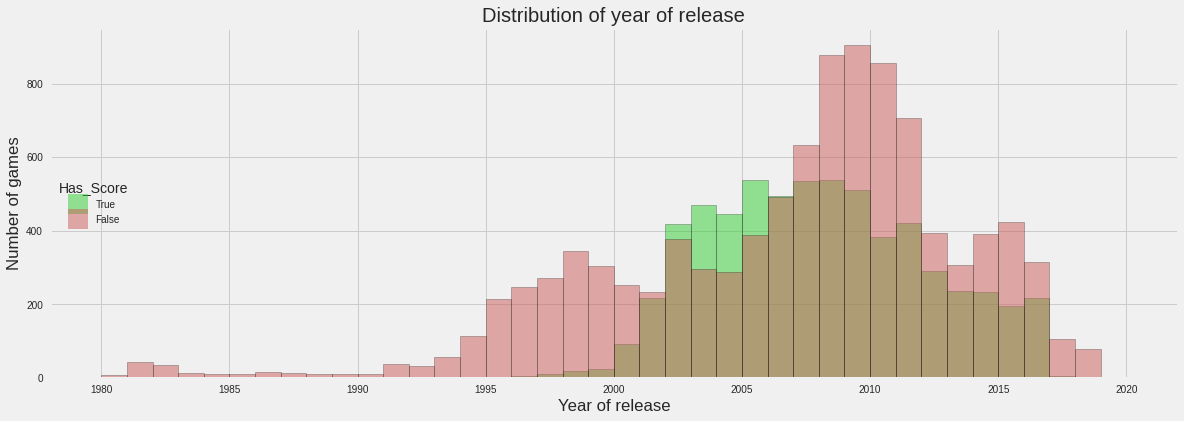

In [250]:
from matplotlib.lines import Line2D
plt.figure(figsize=(18,6))
plt.hist(data[data["Has_Score"]==True]["Year"], color="limegreen", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Year"], color="indianred", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=6);

Vejo que os jogos com pontuação são mais distribuídos entre 2000 e 2015, enquanto há um pico em 2010 para jogos sem pontuação. Provavelmente foram tantos jogos publicados em 2010 que muitos deles passaram despercebidos pela comunidade.


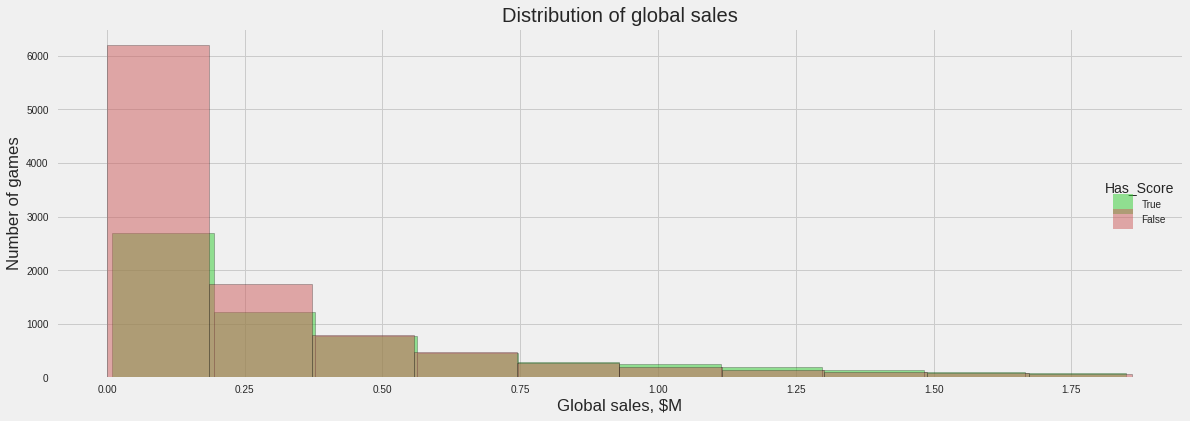

In [251]:
plt.figure(figsize=(18,6))

plt.hist(data[data["Has_Score"]==True]["Global"], color="limegreen", alpha=0.5, 
         edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Global"], color="indianred", alpha=0.5, 
         edgecolor="black")
plt.title("Distribution of global sales")
plt.xlabel("Global sales, $M")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=7);

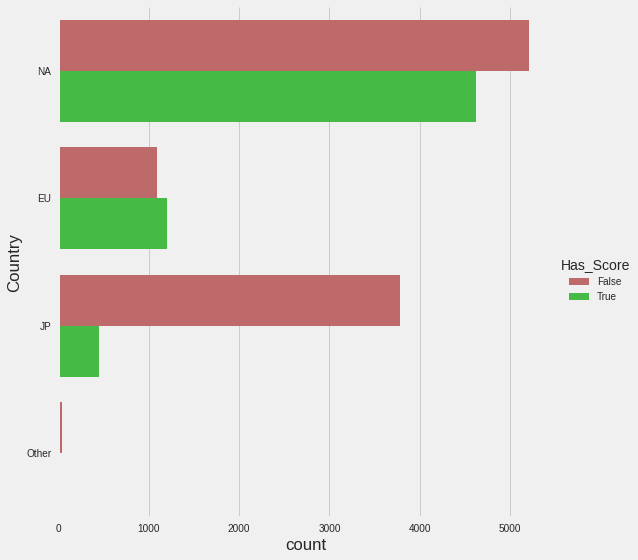

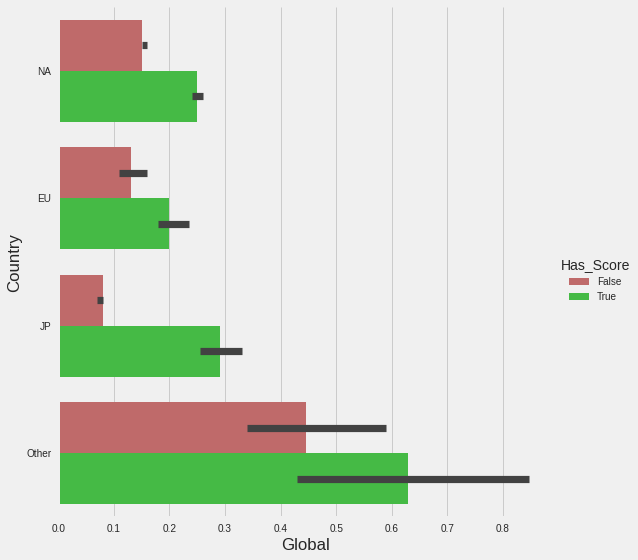

In [252]:
data["Country"] = data[["NA", "EU", "JP", "Other"]].idxmax(1, skipna=True)
palette = {True: "limegreen", False: "indianred"}
sns.factorplot(y="Country", hue="Has_Score", data=data, size=8, kind="count", palette=palette)
sns.factorplot(y="Country", x="Global", hue="Has_Score", data=data, size=8, kind="bar", palette=palette,
               estimator=lambda x: np.median(x));

Embora UE e NA tenham aproximadamente o mesmo número de jogos marcados e não marcados, a situação é absolutamente diferente para o Japão. A maioria dos jogos, que eram mais populares no Japão do que em outras regiões, não tem pontuação de usuário ou crítica. A média de vendas globais é menor para jogos sem pontuação, o que confirma o que vimos no histograma acima.


##  $$ \textbf{Construindo modelo de Machine Learning} $$
Para o meu modelo básico, vou descartar jogos que não tenham pontuação de usuário, pontuação de crítica ou classificação.


In [253]:
scored = data.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year,NA,EU,JP,Other,Critic_Score,Critic_Count,User_Score,User_Count,Global,Age
count,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6208.000000,6229.000000,6208.000000,6229.000000,6229.000000
mean,2007.430085,0.218342,0.117919,0.030851,0.041161,68.875437,27.071521,7.147488,122.679768,0.408273,14.569915
std,4.183661,0.245171,0.164063,0.099918,0.062073,14.080190,17.547323,1.453245,436.149048,0.415399,4.183661
min,1985.000000,0.000000,0.000000,0.000000,0.000000,5.800000,3.000000,0.500000,4.000000,0.010000,5.000000
25%,2004.000000,0.050000,0.020000,0.000000,0.010000,61.000000,13.000000,6.400000,10.000000,0.100000,12.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,71.000000,23.000000,7.500000,23.000000,0.250000,15.000000
75%,2010.000000,0.300000,0.150000,0.010000,0.050000,79.000000,37.000000,8.200000,68.000000,0.570000,18.000000
max,2017.000000,1.810000,1.580000,1.490000,1.180000,98.000000,106.000000,10.000000,10665.000000,1.850000,37.000000


Também removerei outliers na coluna User_Count.


In [254]:
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year,NA,EU,JP,Other,Critic_Score,Critic_Count,User_Score,User_Count,Global,Age
count,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000,5603.000000
mean,2007.054257,0.212211,0.102031,0.030186,0.037533,67.938783,25.083170,7.131090,38.452793,0.381961,14.945743
std,4.013266,0.238645,0.145190,0.100745,0.057988,13.436391,15.759671,1.440852,46.248483,0.389346,4.013266
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.500000,4.000000,0.010000,6.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.010000,60.000000,13.000000,6.400000,9.000000,0.100000,12.000000
50%,2007.000000,0.130000,0.040000,0.000000,0.020000,70.000000,22.000000,7.400000,20.000000,0.240000,15.000000
75%,2010.000000,0.280000,0.130000,0.000000,0.050000,78.000000,34.000000,8.200000,46.000000,0.530000,18.000000
max,2016.000000,1.810000,1.160000,1.490000,1.130000,98.000000,91.000000,9.600000,241.000000,1.850000,37.000000


Apenas 5,5 mil jogos, ~1/3 de todos os jogos em um conjunto de dados. Isso não me parece bom, mas para um modelo básico vai ficar bem.


In [255]:
scored["Platform"].unique(), scored["Genre"].unique(), scored["Rating"].unique()


(array(['Wii', 'GBA', 'PS3', 'DS', 'PS2', '3DS', 'PC', 'X360', 'XB', 'PS4',
        'WiiU', 'XOne', 'PSP', 'PS', 'GC', 'DC', 'PSV'], dtype=object),
 array(['Action', 'Role-Playing', 'Sports', 'Misc', 'Platform',
        'Simulation', 'Fighting', 'Racing', 'Shooter', 'Strategy',
        'Puzzle', 'Adventure'], dtype=object),
 array(['T', 'E', 'E10', 'M', 'RP'], dtype=object))

In [256]:
! pip install category_encoders

import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 651 kB/s 


Existem 17 plataformas únicas, 12 gêneros únicos e 5 classificações nos dados restantes. No modelo avançado, tentarei agrupar plataformas para reduzir a quantidade, mas por enquanto vou apenas codificá-las.


In [257]:

# Select the numeric columns
numeric_subset = scored.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical column
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)
#categorical_subset = pd.DataFrame(categorical_subset, columns = ['Platform','Genre','Rating'])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

In [258]:
features.head()

,Critic_Score,Critic_Count,User_Score,User_Count,Global,Age,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,Platform_7,Platform_8,Platform_9,Platform_10,Platform_11,Platform_12,Platform_13,Platform_14,Platform_15,Platform_16,Platform_17,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11,Genre_12,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
936,71.0,18.0,7.9,75.0,1.85,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
941,76.0,37.0,7.9,84.0,1.85,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
945,82.0,22.0,7.9,76.0,1.83,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
946,80.0,4.0,4.5,8.0,1.84,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
947,87.0,25.0,8.5,36.0,1.83,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [259]:
correlations.head(5)


Platform_7    -0.180570
Genre_10      -0.097379
Genre_12      -0.085873
Platform_17   -0.069933
Platform_10   -0.057099
Name: Global, dtype: float64

In [260]:
correlations.tail(5)


User_Score      0.152936
User_Count      0.250542
Critic_Score    0.285669
Critic_Count    0.287526
Global          1.000000
Name: Global, dtype: float64

In [261]:
features.shape

(5603, 40)

### $$\textbf{Separando em Treino e Teste} $$

In [262]:
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.3,
                                                                            random_state=60)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3922, 39)
(1681, 39)
(3922,)
(1681,)


In [273]:
#  Definindo uma função para avaliar meu modelo. Vou usar erro absoluto médio.
import math 
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))
    
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae


Para a estimativa de linha de base, usarei o valor médio das vendas globais no conjunto de dados do treino.

In [264]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.24
Baseline Performance on the test set: MAE = 0.2707


Vou comparar vários modelos simples com diferentes tipos de regressão e depois focar no melhor para ajuste de hiperparâmetros.


In [265]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [266]:
lr_mae = fit_and_evaluate(LinearRegression()) 
svm_mae  =  fit_and_evaluate(SVR(C = 100, gamma=0.1))
gradient_boosting_mae   = fit_and_evaluate(GradientBoostingRegressor(random_state=80)) 
random_forest_mae   = fit_and_evaluate(RandomForestRegressor(random_state=60)) 

knn_mae  =fit_and_evaluate(KNeighborsRegressor(n_neighbors=10))
ridge_mae  = fit_and_evaluate(Ridge(alpha=10)) 

### Tipos de métricas exploradas 
* Erro Médio Absoluto - MAE
O erro médio absoluto, MAE (da sigla em inglês Mean Absolute Error), é calculado a partir da média dos erros absolutos, ou seja, utilizamos o módulo de cada erro para evitar a subestimação, isso porque, o valor é menos afetado por pontos especialmente extremos (outliers).

Cada erro, pode ser interpretado como a diferença entre Y e Ŷ e assim, temos:
$$ MAE = \frac{1}{n}\sum_{i}^{n}|y_i test - y_ipred |$$

* Erro Quadrático Médio - MSE

O erro quadrático médio, MSE (da sigla em inglês Mean Squared Error), é comumente usado para verificar a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e isso influência a penalização de erros maiores, após isso, a média desses erros quadráticos é calculada
$$ MSE = \frac{1}{n}\sum_{i}^{n}(y_i test - y_ipred )^{2}$$

* Raiz Quadrada do Erro Médio - RMSE
A raiz quadrada do erro médio, RMSE (da sigla em inglês Root Mean Squared Error) é apenas a raiz quadrada do MSE, onde o erro retorna à unidade de medida do modelo (no MSE, a unidade de medida é quadrática).

É frequentemente usada em séries temporais por ser mais sensível a erros maiores devido ao processo de quadratura que a produziu.

A equação para cálculo, dá-se por:
$$ RMSE = \sum_{i}^{n}\frac{(y_i test - y_ipred )^{2}}{n}$$



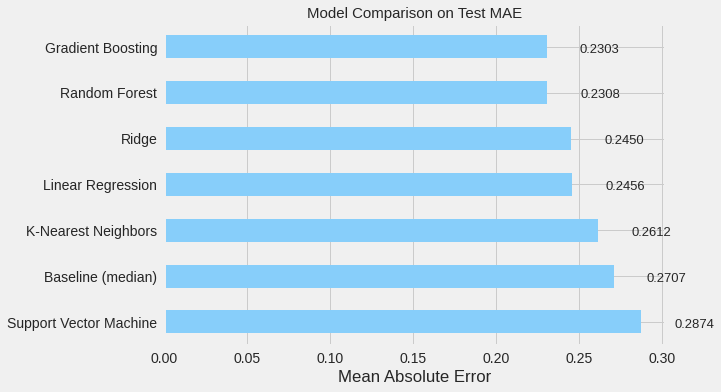

In [276]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae]})

error_mae = model_comparison['mae'].sort_values(ascending=False)


modelmae = model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)

plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=15)

for i, v in enumerate(error_mae):
  modelmae.text(v+.02, i-.12, str(v)[:6], fontsize=13)


### **$$\textbf{Melhor Modelo : Gradient Boosting} $$** 
Primeiro, usarei a pesquisa aleatória (**RandomSearch**) para encontrar os melhores parâmetros e, em seguida, usarei a pesquisa de grade ( **GridSearch** ) para otimizar n_estimators.
* **Gradient Boosting para regressão.**

Este estimador constrói um modelo aditivo de forma progressiva; ele permite a otimização de funções de perda diferenciáveis ​​arbitrárias. Em cada estágio uma árvore de regressão é ajustada no gradiente negativo da função de perda dada.

* **loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’**
>>Função de perda a ser otimizada. 'squared_error' refere-se ao erro quadrado para regressão. ‘absolute_error’ refere-se ao erro absoluto de regressão e é uma função de perda robusta. 'huber' é uma combinação dos dois. 'quantil' permite regressão quantílica (use alfa para especificar o quantil).

* **n_estimators (int, default=100)**
>> O número de estágios de reforço a serem executados. O aumento de gradiente é bastante robusto ao ajuste excessivo, portanto, um número grande geralmente resulta em melhor desempenho.

* **min_samples_splitint or float, default=2**
>>O número mínimo de amostras necessárias para dividir um nó interno

*  **min_samples_leafint or float, default=1**
>>O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos amostras de treinamento min_samples_leaf em cada um dos ramos esquerdo e direito. Isso pode ter o efeito de suavizar o modelo, especialmente na regressão.

* **max_depthint, default=3**
>>Profundidade máxima dos estimadores de regressão individuais. A profundidade máxima limita o número de nós na árvore. Ajuste este parâmetro para melhor desempenho; o melhor valor depende da interação das variáveis ​​de entrada.





In [277]:
 
# Loss function to be optimized
loss = ["squared_error", "absolute_error", "huber",'quantile']

# Maximum depth of each tree
max_depth = [2,3, 5,7,9, 13,15,20,25]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8,10,12,14,16]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10,12,14]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

subsample = [0,0.25,0.5,0.7,1]


criterion = ['friedman_mse']
                       
hyperparameter_grid_Boosting = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features, 
                       "criterion":criterion, "subsample":subsample}

                       

In [278]:
from sklearn.model_selection import RandomizedSearchCV

Boosting = GradientBoostingRegressor(random_state = 39)
random_cv = RandomizedSearchCV(Boosting ,
                               param_distributions=hyperparameter_grid_Boosting,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=39)

In [279]:
random_cv.fit(features_train, target_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=39),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse'],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 5, 7, 9, 13, 15, 20,
                                                      25],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 14, 16],
                                        'min_samples_split': [2, 4, 6, 10, 12,
                                                              14],
                    

In [280]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                        "param_max_features"]]


,mean_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
19,-0.210764,9,14,2,log2
14,-0.211643,7,10,10,sqrt
13,-0.218714,7,2,10,sqrt
1,-0.219087,15,12,4,log2
18,-0.219443,7,2,12,sqrt
12,-0.221984,9,2,12,sqrt
5,-0.222228,13,8,2,auto
0,-0.227559,9,6,12,None
10,-0.230354,2,12,12,log2
15,-0.231106,20,4,4,auto


In [281]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='absolute_error', max_depth=9,
                          max_features='log2', min_samples_leaf=14,
                          random_state=39, subsample=0.5)

In [283]:

target_pred = random_cv.predict(features_test)
print(" best estimator{} \n\n Score {}".format(random_cv.best_estimator_ ,random_cv.score(features_test,target_test)))

 best estimatorGradientBoostingRegressor(loss='absolute_error', max_depth=9,
                          max_features='log2', min_samples_leaf=14,
                          random_state=39, subsample=0.5) 

 Score -0.21231518853154654


### $$\textbf{Usando GridSearch para n_estimators} $$


In [284]:
from sklearn.model_selection import GridSearchCV

trees_grid = {"n_estimators": range(0,300,15)}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator= basic_model, param_grid= trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

In [285]:
grid_search.fit(features_train, target_train);


Fitting 4 folds for each of 20 candidates, totalling 80 fits


In [286]:
target_pred = grid_search.predict(features_test)
print(" best estimator{} \n\n Score {} ".format(grid_search.best_estimator_ ,grid_search.score(features_test,target_test) ))

 best estimatorGradientBoostingRegressor(loss='absolute_error', max_depth=9,
                          max_features='log2', min_samples_leaf=14,
                          n_estimators=135, random_state=39, subsample=0.5) 

 Score -0.21122866521784012 


# Como o número de árvores afeta o desempenho.


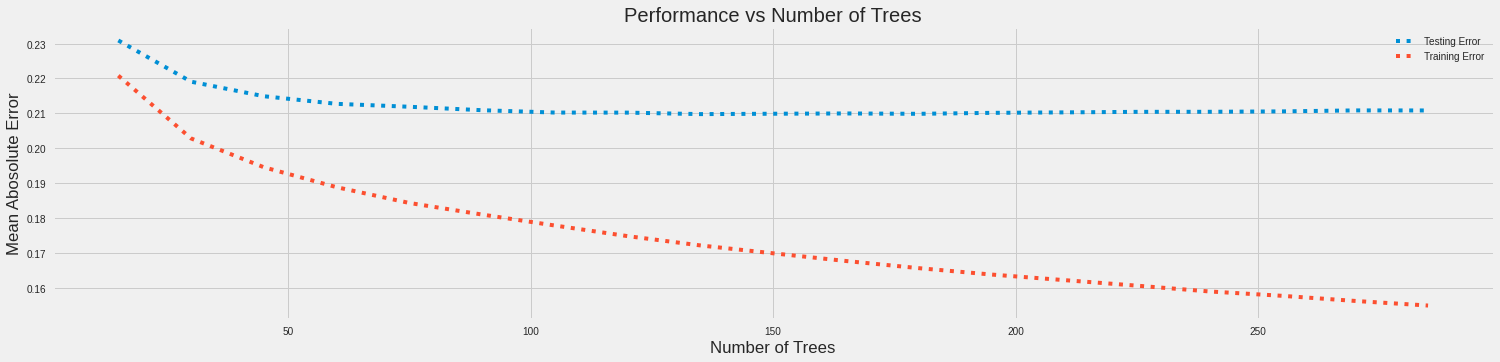

In [287]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(23,5))
plt.plot(results["param_n_estimators"], np.abs(results["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results["param_n_estimators"], np.abs(results["mean_train_score"]), label = "Training Error", linestyle = 'dotted')
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

O gráfico mostra que o modelo está sobreajustado. O erro de treinamento continua diminuindo, enquanto o erro de teste permanece quase o mesmo. Isso significa que o modelo aprende exemplos de treinamento muito bem, mas não pode generalizar em dados novos e desconhecidos. Este não é um modelo muito bom, mas vou deixá-lo como está e tentar combater o overfitting no modelo avançado usando imputação, seleção de recursos e engenharia de recursos.


In [288]:
basic_final_model = grid_search.best_estimator_
basic_final_model

GradientBoostingRegressor(loss='absolute_error', max_depth=9,
                          max_features='log2', min_samples_leaf=14,
                          n_estimators=135, random_state=39, subsample=0.5)

In [290]:
basic_final_pred = basic_final_model.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f} ".format(basic_final_mae))

Final model performance on the test set: MAE = 0.2112 


O MAE caiu, mas por uma margem muito pequena. Parece que o ajuste de hiperparâmetros realmente não melhorou o modelo. 
Aplicaremos em seguida um modelo mais sofisticado com o tratamento dos dados, com novas features , modeficaremos o tamanho do dataset de test e treino e aumentaremos o número de fits juntos com maiores escolhas de parâmetros .

Para finalizar com o modelo básico vou desenhar 2 gráficos. A primeira é a comparação de densidades de valores de treino, valores de teste e previsões.



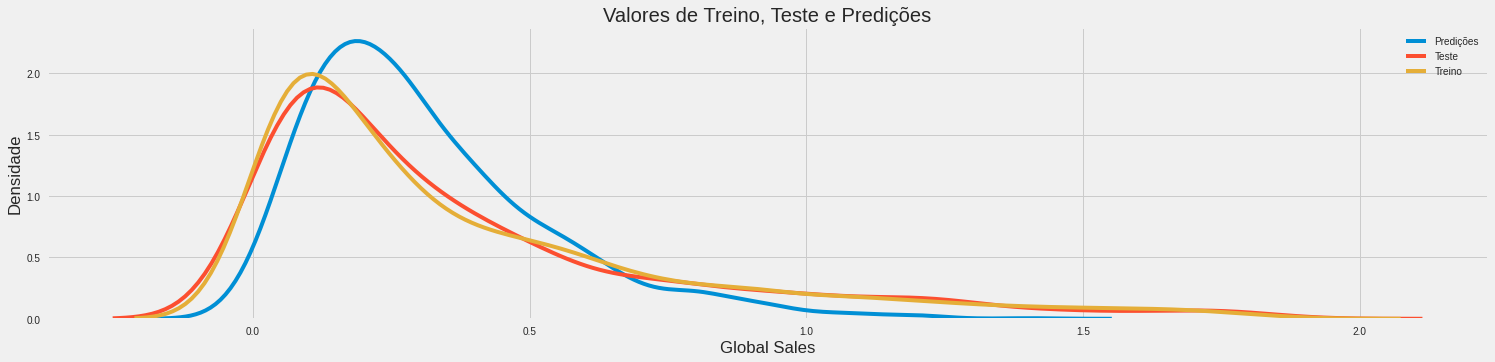

In [291]:
plt.figure(figsize=(23,5))
sns.kdeplot(basic_final_pred, label = "Predições")
sns.kdeplot(target_test, label = "Teste")
sns.kdeplot(target_train, label = "Treino")
plt.legend()
plt.xlabel("Global Sales"); plt.ylabel("Densidade");
plt.title("Valores de Treino, Teste e Predições");

A densidade das previsões é movida um pouco para a direita, comparando com as densidades dos valores iniciais. A cauda também é diferente. Isso pode ajudar a ajustar o modelo no futuro.
## $$\textbf{Histograma de Resíduos} $$
####- diferenças entre valores reais e previsões.



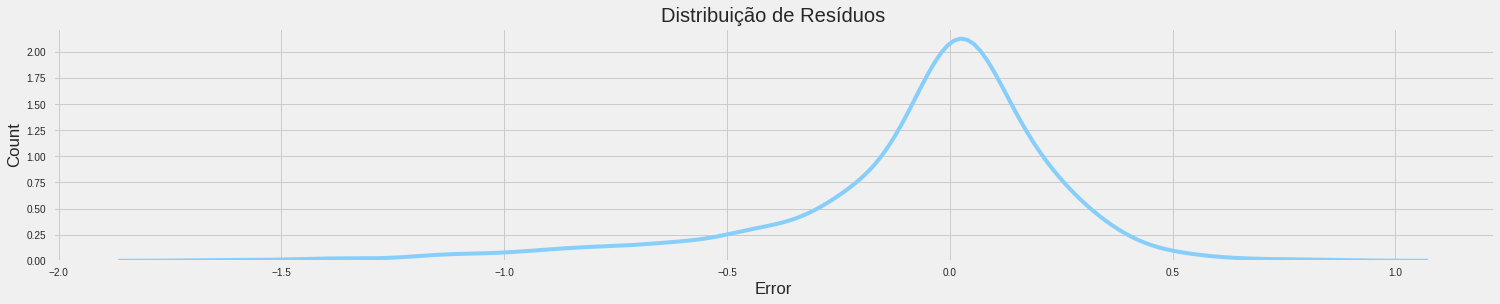

In [292]:
basic_residuals = basic_final_pred - target_test
plt.figure(figsize=(23,4))
sns.kdeplot(basic_residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribuição de Resíduos");

## $$ \textbf{Modelo Machine Learning mais avançado} $$

>Inicialmente temos plot das features categoricas pra entendermos sua quantidade em porcentagem em nosso dataset e fazer agrupamentos mais inteligentes, simplificando o dataset e ao mesmo tempo deixando mais complexo

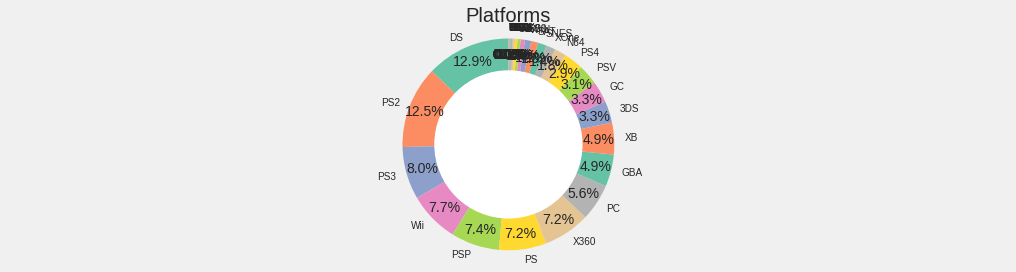

In [293]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
plt.figure(figsize=(16,4))

donut_chart(data["Platform"])
plt.title("Platforms")
plt.axis("equal");

Existem muitas plataformas diferentes e a maioria delas representa uma porcentagem muito pequena dos jogos. Vou agrupar plataformas para reduzir o número de funcionalidades.


In [294]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [295]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

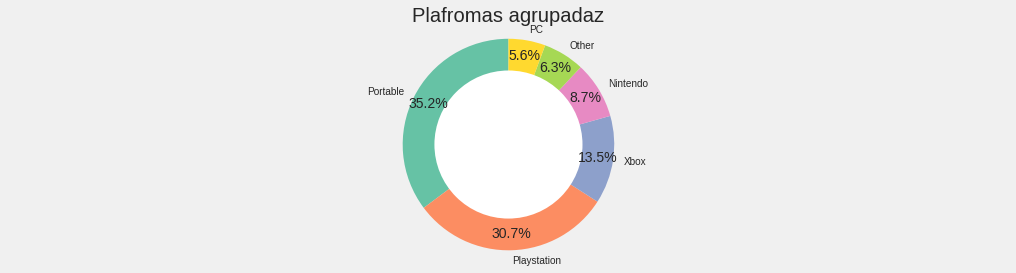

In [296]:
data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
plt.figure(figsize=(16,4))

donut_chart(data["Grouped_Platform"])
plt.title("Plafromas agrupadaz")
plt.axis("equal");

Agora eu quero verificar a mesma coisa para gêneros.


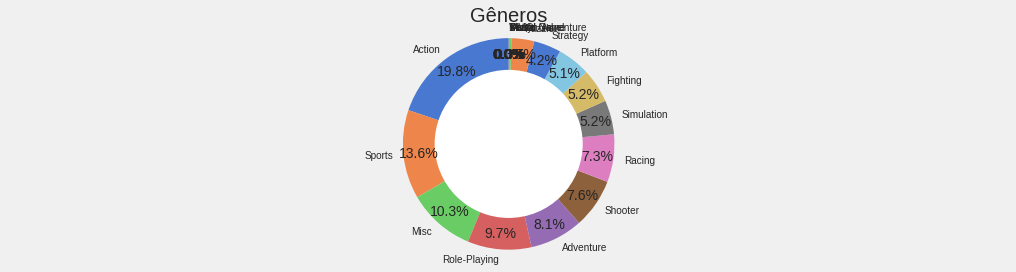

In [297]:
plt.figure(figsize=(16,4))

donut_chart(data["Genre"], palette="muted")
plt.title("Gêneros")
plt.axis("equal");

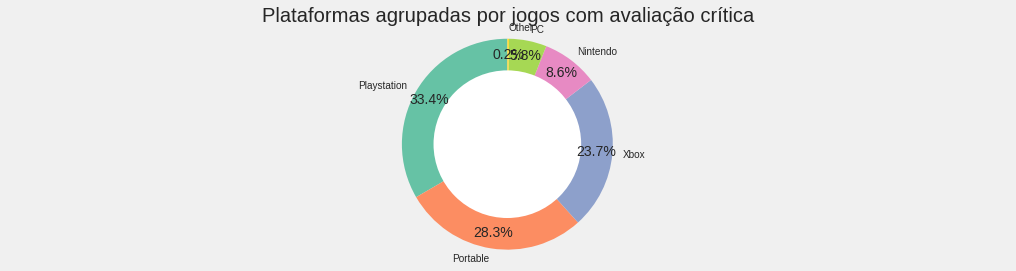

In [298]:
plt.figure(figsize=(16,4))

scored["Grouped_Platform"] = scored["Platform"].apply(lambda x: get_group_label(x, platforms))
donut_chart(scored["Grouped_Platform"])
plt.title("Plataformas agrupadas por jogos com avaliação crítica")
plt.axis("equal");

In [299]:
scored[scored["Grouped_Platform"]=="Other"]


,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global,Age,Has_Score,Country,Grouped_Platform
1712,Shenmue,DC,1999,Adventure,Sega,0.52,0.24,0.38,0.04,88.0,9.0,9.4,201.0,Sega AM2,T,1.18,23,True,NA,Other
1877,NFL 2K1,DC,2000,Sports,Sega,1.02,0.05,0.00,0.02,97.0,22.0,6.0,47.0,Visual Concepts,E,1.09,22,True,NA,Other
3815,Seaman,DC,1999,Simulation,Sega,0.00,0.00,0.52,0.00,82.0,24.0,8.4,16.0,Vivarium,T,0.52,23,True,JP,Other
5350,SoulCalibur,DC,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,98.0,24.0,8.8,200.0,Namco,T,0.34,23,True,JP,Other
7231,Capcom vs. SNK,DC,2000,Fighting,Virgin Interactive,0.00,0.00,0.22,0.00,80.0,17.0,9.0,24.0,Capcom,T,0.22,22,True,JP,Other
7521,Phantasy Star Online,DC,2000,Role-Playing,Sega,0.00,0.00,0.20,0.00,89.0,21.0,9.1,33.0,Sonic Team,T,0.20,22,True,JP,Other
7643,Grandia II,DC,2000,Role-Playing,Ubisoft,0.00,0.00,0.20,0.00,90.0,17.0,8.8,57.0,Game Arts,T,0.20,22,True,JP,Other
7978,Phantasy Star Online Ver. 2,DC,2001,Role-Playing,Sega,0.00,0.00,0.19,0.00,80.0,10.0,8.9,18.0,Sonic Team,T,0.19,21,True,JP,Other
8905,Shenmue II,DC,2001,Adventure,Sega,0.00,0.00,0.15,0.00,88.0,9.0,9.4,201.0,Sega AM2,T,0.15,21,True,JP,Other
9559,Sega GT,DC,2000,Racing,Sega,0.00,0.00,0.13,0.00,84.0,25.0,7.7,11.0,TOSE,E,0.13,22,True,JP,Other


Todos esses jogos são para a plataforma "DC" que é o Sega Dreamcast, o último dos consoles da Sega. Foi lançado em 1998 e foi o primeiro dos consoles de sexta geração, PS2, Gamecube e Xbox. Dreamcast era realmente um produto muito bom e inovador que recebeu muito crédito positivo, mas não podia competir com os consoles da Sony ou da Microsoft e a Sega foi forçada a interromper a produção.

Em 2006, a Sega iniciou uma nova onda de vendas de consoles e jogos Dreamcast, que foram restaurados das sobras da primeira produção. Depois disso, a IGN relançou sua seção IGN Dreamcast para revisar esses jogos e compará-los com jogos de PS3, Xbox 360 e Wii.

Em seguida, quero criar alguns novos recursos: pontuação ponderada e minha própria classificação de desenvolvedor. Primeiro, encontro a porcentagem de todos os jogos criados por cada desenvolvedor e, em seguida, calculo a porcentagem cumulativa começando com os desenvolvedores com o menor número de jogos. Por fim, divido-os em 5 grupos (20% cada). Rank mais alto significa mais jogos desenvolvidos.

In [300]:
scored["Weighted_Score"] = (scored["User_Score"] * 10 * scored["User_Count"] + 
                            scored["Critic_Score"] * scored["Critic_Count"]) / (scored["User_Count"] + scored["Critic_Count"])
devs = pd.DataFrame({"dev": scored["Developer"].value_counts().index,
                     "count": scored["Developer"].value_counts().values})
m_score = pd.DataFrame({"dev": scored.groupby("Developer")["Weighted_Score"].mean().index,
                        "mean_score": scored.groupby("Developer")["Weighted_Score"].mean().values})
devs = pd.merge(devs, m_score, on="dev")
devs = devs.sort_values(by="count", ascending=True)
devs["percent"] = devs["count"] / devs["count"].sum()
devs["top%"] = devs["percent"].cumsum() * 100
n_groups = 5
devs["top_group"] = (devs["top%"] * n_groups) // 100 + 1
devs["top_group"].iloc[-1] = n_groups
devs

,dev,count,mean_score,percent,top%,top_group
1179,Atomic Games,1,58.654545,0.000178,0.017848,1.0
845,WorkJam,1,71.857143,0.000178,0.035695,1.0
846,Autumn Moon,1,79.310345,0.000178,0.053543,1.0
847,DiP Interactive,1,31.555556,0.000178,0.071390,1.0
848,"Rebellion, Neversoft Entertainment",1,73.540000,0.000178,0.089238,1.0
...,...,...,...,...,...,...
4,Konami,81,69.986219,0.014457,92.414778,5.0
3,Ubisoft,86,65.797942,0.015349,93.949670,5.0
2,Capcom,92,74.710656,0.016420,95.591647,5.0
1,EA Sports,119,75.787117,0.021239,97.715510,5.0


Text(0.5, 0.98, 'Developers')

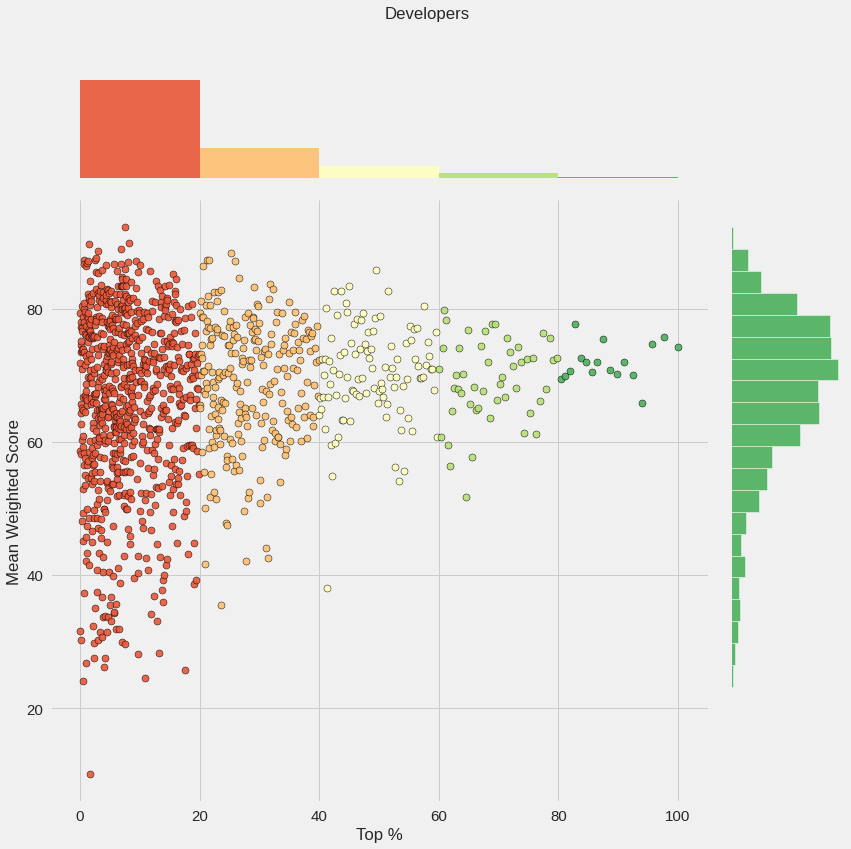

In [301]:
pal = sns.color_palette("RdYlGn", n_groups)
g = sns.JointGrid(x="top%", y="mean_score", data=devs, size=12)
legend_elements = []
for k in range(0, n_groups):
    g.ax_joint.scatter(devs[devs["top_group"]==k+1]["top%"], 
                       devs[devs["top_group"]==k+1]["mean_score"],
                       color=pal[k], alpha=.9, edgecolor="black")
    legend_elements.append(Line2D([0], [0], label=k+1, marker="o", ls="", 
                                  mfc=pal[k], mec=pal[k], alpha=.9, markersize=15))
    g.ax_marg_x.bar(np.arange(k * 100 / n_groups, (k+1) * 100 / n_groups), 
                    devs[devs["top_group"]==k+1].shape[0], 
                    width=1, align="edge", color=pal[k], alpha=.9)
g.ax_marg_y.hist(devs["mean_score"], color=pal[-1], alpha=.9,
                 orientation="horizontal", bins=25, edgecolor="white")
g.set_axis_labels("Top %", "Mean Weighted Score")
g.ax_joint.tick_params(labelsize=15)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
#g.ax_joint.legend(handles=legend_elements, title="Top Group", loc=4)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Developers")

Antes de criar e ajustar um modelo, tenho que preencher os valores ausentes. Estou preenchendo pontuações e contagens com zeros, porque não havia pontuações ou contagens zero reais no conjunto de dados, portanto, isso indicará ausência de pontuações.


In [302]:
data["Critic_Score"].fillna(0.0, inplace=True)
data["Critic_Count"].fillna(0.0, inplace=True)
data["User_Score"].fillna(0.0, inplace=True)
data["User_Count"].fillna(0.0, inplace=True)
data = data.join(devs.set_index("dev")["top_group"], on="Developer")
data = data.rename(columns={"top_group": "Developer_Rank"})
data["Developer_Rank"].fillna(0.0, inplace=True)
data["Rating"].fillna("None", inplace=True)

In [303]:
tmp, rmvd_tmp = rm_outliers(data[data["User_Count"] != 0], ["User_Count"])
data.drop(rmvd_tmp.index, axis=0, inplace=True)

In [304]:
data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                            data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])
data["Weighted_Score"].fillna(0.0, inplace=True)

In [305]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15743 entries, 929 to 33570
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              15743 non-null  object 
 1   Platform          15743 non-null  object 
 2   Year              15743 non-null  int64  
 3   Genre             15743 non-null  object 
 4   Publisher         15712 non-null  object 
 5   NA                15743 non-null  float64
 6   EU                15743 non-null  float64
 7   JP                15743 non-null  float64
 8   Other             15743 non-null  float64
 9   Critic_Score      15743 non-null  float64
 10  Critic_Count      15743 non-null  float64
 11  User_Score        15743 non-null  float64
 12  User_Count        15743 non-null  float64
 13  Developer         9475 non-null   object 
 14  Rating            15743 non-null  object 
 15  Global            15743 non-null  float64
 16  Age               15743 non-null  int6

Agora farei as mesmas coisas que fiz no modelo básico, exceto pelo uso de codificação Ordinal para valores categóricos em vez de OneHot. Eu tentei diferentes tipos de codificações e o ordinal parece funcionar melhor.


In [306]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = data.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical columns
categorical_subset = data[["Grouped_Platform", "Genre", "Rating"]]

# One hot encode
# categorical_subset = pd.get_dummies(categorical_subset)

mapping = []
for cat in categorical_subset.columns:
    tmp = scored.groupby(cat).median()["Weighted_Score"]
    mapping.append({"col": cat, "mapping": [x for x in np.argsort(tmp).items()]})
    
encoder = ce.ordinal.OrdinalEncoder()
categorical_subset = encoder.fit_transform(categorical_subset, mapping=mapping)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

In [307]:
features

,Critic_Score,Critic_Count,User_Score,User_Count,Global,Age,Developer_Rank,Weighted_Score,Grouped_Platform,Genre,Rating
929,0.0,0.0,0.0,0.0,1.86,21,0.0,0.000000,1,1,1
936,71.0,18.0,7.9,75.0,1.85,14,4.0,77.451613,2,2,2
941,76.0,37.0,7.9,84.0,1.85,18,2.0,78.082645,1,3,3
942,0.0,0.0,0.0,0.0,1.85,38,0.0,0.000000,3,2,1
944,0.0,0.0,0.0,0.0,1.85,21,0.0,0.000000,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...
32194,0.0,0.0,0.0,0.0,0.04,4,0.0,0.000000,3,9,2
32222,0.0,0.0,0.0,0.0,0.04,5,0.0,0.000000,1,3,2
32328,0.0,0.0,0.0,0.0,0.05,8,0.0,0.000000,1,7,1
32731,0.0,0.0,0.0,0.0,0.04,15,0.0,0.000000,4,12,4


## $$\textbf{Separando em Treino e Teste} $$

In [308]:

basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.4,
                                                                            random_state=42)
baseline_guess = np.median(target_train)
baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess para as Vendas Globais: {:.02f}".format(baseline_guess))
print("Baseline Performance sobre o Teste: MAE = {:.04f} ".format(baseline_mae))

Baseline guess para as Vendas Globais: 0.16
Baseline Performance sobre o Teste: MAE = 0.2294 


In [309]:
model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions= hyperparameter_grid_Boosting,
                               cv=5, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)
random_cv.fit(features_train,target_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [310]:
random_cv.score(features_test,target_test)

-0.189947920037188

In [311]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='absolute_error', max_depth=13,
                          min_samples_leaf=6, random_state=42, subsample=0.7)

In [312]:
trees_grid = {"n_estimators": range(0,320,10)}

model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=5, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)
grid_search.fit(features_train, target_train);

Fitting 5 folds for each of 32 candidates, totalling 160 fits


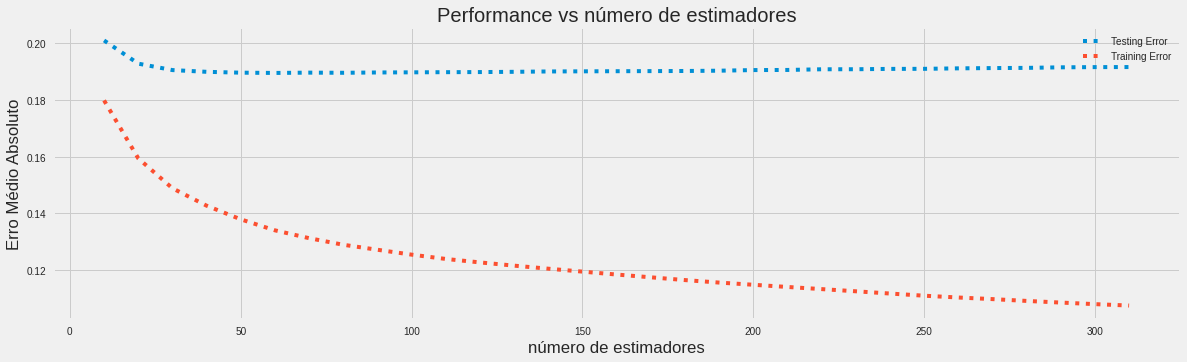

In [313]:
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize = (18,5))

plt.plot(results["param_n_estimators"], np.abs(results["mean_test_score"]), label = "Testing Error", linestyle='dotted')
plt.plot(results["param_n_estimators"], np.abs(results["mean_train_score"]), label = "Training Error", linestyle ='dotted')
plt.xlabel("número de estimadores"); plt.ylabel("Erro Médio Absoluto"); plt.legend();
plt.title("Performance vs número de estimadores");
plt.grid(True)

In [314]:
grid_search.best_estimator_

GradientBoostingRegressor(loss='absolute_error', max_depth=13,
                          min_samples_leaf=6, n_estimators=60, random_state=42,
                          subsample=0.7)

In [315]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(features_test)
final_mae = mae(target_test, final_pred)
print("Final model performance on the test set: MAE = {:.04f} .".format(final_mae))

Final model performance on the test set: MAE = 0.1886 .


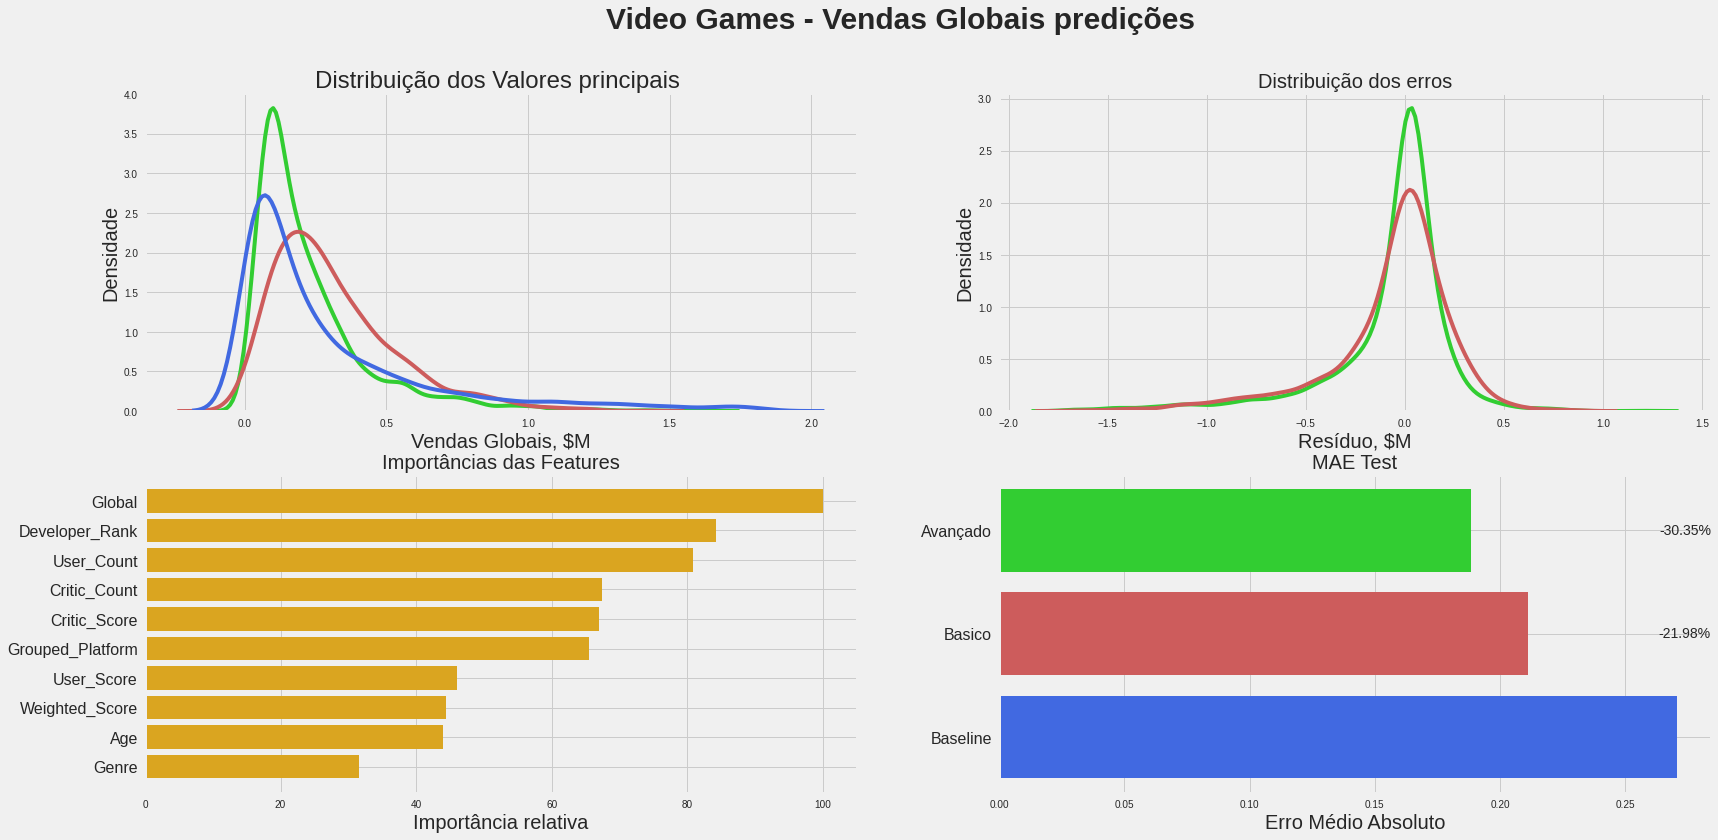

In [328]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 12))
gs = gridspec.GridSpec(2, 2)

plt.suptitle("Video Games - Vendas Globais predições", size=30, weight="bold");

ax = fig.add_subplot(gs[0, 0])
plt.sca(ax)
sns.kdeplot(final_pred, color="limegreen", label="Modelo Avançado")
sns.kdeplot(basic_final_pred, color="indianred", label=" Modelo Basico")
sns.kdeplot(target_test, color="royalblue", label="Testr")
plt.xlabel("Vendas Globais, $M", size=20); plt.ylabel("Densidade", size=20);
plt.title("Distribuição dos Valores principais ", size=24);

residuals = final_pred - target_test
ax = fig.add_subplot(gs[0, 1])
plt.sca(ax)
sns.kdeplot(residuals, color = "limegreen", label="Modelo Avançado")
sns.kdeplot(basic_residuals, color="indianred", label="Modelo Basico")
plt.xlabel("Resíduo, $M", size=20);plt.ylabel("Densidade", size=20);
plt.title("Distribuição dos erros", size=20);

feature_importance = final_model.feature_importances_
feature_names = features.columns.tolist()
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
ax = fig.add_subplot(gs[1, 0])
plt.sca(ax)
plt.barh(pos, feature_importance[sorted_idx], align='center', color="goldenrod")
plt.yticks(pos, [feature_names[x] for x in sorted_idx], size=16)
plt.xlabel('Importância relativa', size=20)
plt.title('Importâncias das Features', size=20);

model_comparison = pd.DataFrame({"model": ["Baseline", "Basico", "Avançado"],
                                 "mae": [basic_baseline_mae, basic_final_mae, final_mae],
                                 "diff": ["0.00%", "-{:.2f}%".format((1 - basic_final_mae / basic_baseline_mae) * 100), "-{:.2f}%".format((1 - final_mae / basic_baseline_mae) * 100)],
                                 "color": ["royalblue", "indianred", "limegreen"]})
model_comparison['mae'].sort_values(ascending=False)

pos = np.arange(3) + .5
ax = fig.add_subplot(gs[1, 1])
plt.sca(ax)
plt.barh(pos, model_comparison["mae"], align="center", color=model_comparison["color"])

for i in [1, 2]:
    plt.text(plt.xlim()[1], pos[i], model_comparison["diff"][i], 
             verticalalignment="center", horizontalalignment="right")
plt.yticks(pos, model_comparison["model"], size=16); plt.xlabel("Erro Médio Absoluto", size=20);
plt.title("MAE Test", size=20);
